# Predicting Default in P2P Lending: Leveraging Supervised Machine Learning and Macroeconomic Factors for Enhanced Risk Assessment

In this research, we aim to investigate the applicability and performance of hybrid machine learning techniques in improving the accuracy and reliability of predicting loan defaults in Peer-to-Peer (P2P) lending platforms. 

This notebook is the first part in which exploratory data analysis is conducted and the hypotheses are tested.

Our hypotheses include:

- H1: The loan grades assigned by lenders strongly associate with loan defaults. We hypothesize that borrowers with lower loan grades have a higher probability of default compared to those with higher grades.
- H2: Variations in macroeconomic conditions significantly influence the likelihood of loan defaults in P2P lending.


# Table of Contents

1. Data Collection
2. Data Understandin
3. Data Cleaning
4. Feature Engineering
5. Exploratory Data Analysis
6. Hypothesis Testing
7. Conclusion

## Data Collection

In [1]:
%reset -f

In [2]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import hvplot.pandas
import gc

In [3]:
# Reading the LendingClub Loan Data
df_loans = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/loan.csv")

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_21556\3924328017.py:2: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loans = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/loan.csv")


In [4]:
# Reading the change in GDP Data per State
df_dGDP = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Change in GDP.csv")

In [5]:
# Reading the change in Real GDP per State
df_dRGDP = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Change in Real GDP.csv")

In [6]:
# Reading the Unemployment rate per State
df_unemp = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Unemployment rate per state per month.csv")

In [7]:
# Reading the CPI per census region
df_CPI = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/CPI per census region.csv")

In [8]:
# Reading the Russell 2000 index
df_Russell = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Russel 2000 index.csv")

In [9]:
# Reading the FED interest rates
df_fed = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/FEDFUNDS.csv")

### Data Understanding

LendingClub Loan Data

In [10]:
df_loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  

[5 rows x 145 columns]

In [11]:
num_rows = df_loans.shape[0]
print("Number of rows: ", num_rows)

Number of rows:  2260668


Change in GDP per State year over year

In [12]:
df_dGDP.head(5)

addr_state  dGDP0607  dGDP0708  dGDP0809  dGDP0910  dGDP1011  dGDP1112  \
0         AL       3.9       0.9      -2.1       3.7       3.8       2.9   
1         AK      10.0      11.2      -9.4       6.8       6.7       2.4   
2         AZ       6.3       0.6      -6.3       1.9       3.9       4.0   
3         AR       2.6       1.3      -2.2       4.1       4.2       2.6   
4         CA       4.8       2.4      -2.8       3.4       3.6       4.4   

   dGDP1213  
0       2.9  
1      -1.8  
2       2.6  
3       4.4  
4       5.1

Change in Real GDP year over year

In [13]:
df_dRGDP.head(5)

addr_state  dRGDP0607  dRGDP0708  dRGDP0809  dRGDP0910  dRGDP1011  \
0         AL        0.9       -1.1       -3.3        2.2        1.6   
1         AK        5.1       -0.9        9.7       -2.9        1.2   
2         AZ        3.3       -0.9       -8.3        1.1        2.2   
3         AR       -0.8       -1.0       -3.3        2.6        2.1   
4         CA        1.9        1.0       -3.2        2.0        1.4   

   dRGDP1112  dRGDP1213  
0        0.9        1.1  
1        5.4       -5.0  
2        2.0        0.8  
3        0.5        2.1  
4        2.4        3.1

Unemployment rate per month per state

In [14]:
df_unemp.head()

addr_state  Dec/06  Jan/07  Feb/07  Mar/07  Apr/07  May/07  Jun/07  Jul/07  \
0         AL     3.8     3.8     3.8     3.9     3.9     3.9     4.0     4.0   
1         AK     6.3     6.3     6.2     6.2     6.2     6.2     6.3     6.3   
2         AZ     4.0     3.9     3.9     3.8     3.7     3.6     3.5     3.5   
3         AR     5.3     5.3     5.3     5.3     5.3     5.4     5.5     5.5   
4         CA     4.9     4.9     5.0     5.0     5.1     5.1     5.2     5.3   

   Aug/07  ...  Mar/13  Apr/13  May/13  Jun/13  Jul/13  Aug/13  Sep/13  \
0     4.1  ...     7.5     7.4     7.3     7.3     7.2     7.2     7.2   
1     6.3  ...     7.0     7.0     7.0     7.0     7.0     7.0     7.0   
2     3.5  ...     8.0     8.0     7.9     7.9     7.8     7.8     7.7   
3     5.5  ...     7.2     7.2     7.2     7.1     7.1     7.1     7.0   
4     5.4  ...     9.4     9.3     9.2     9.1     9.0     8.9     8.8   

   Oct/13  Nov/13  Dec/13  
0     7.2     7.2     7.2  
1     7.0     6.9     6.9  
2     7.6     7.5     7.4  
3     6.9     6.7     6.6  
4     8.6     8.5     8.4  

[5 rows x 86 columns]

Consumer Price Index per month per census region

In [15]:
df_CPI.head()

census_region  Dec/06   Jan/07   Feb/07   Mar/07   Apr/07   May/07   Jun/07  \
0     Northeast   215.2  215.813  216.651  218.334  219.501  220.591  221.579   
1       Midwest   192.9  193.068  194.458  196.389  197.405  199.194  199.263   
2         South   194.8  195.021  195.950  197.904  199.618  200.804  201.675   
3          West   206.2  207.790  208.995  210.778  212.036  213.063  212.680   

    Jul/07   Aug/07  ...   Mar/13   Apr/13   May/13   Jun/13   Jul/13  \
0  221.945  221.559  ...  248.719  248.464  248.584  248.851  249.411   
1  198.989  198.551  ...  222.121  221.931  223.049  223.775  222.902   
2  201.571  201.041  ...  226.628  226.202  226.289  227.148  227.548   
3  212.542  212.406  ...  235.511  235.488  235.979  236.227  236.341   

    Aug/13   Sep/13   Oct/13   Nov/13   Dec/13  
0  249.858  250.231  249.320  249.503  249.567  
1  223.046  223.252  222.171  221.718  221.194  
2  227.837  227.876  227.420  226.811  227.082  
3  236.591  237.146  237.000  236.153  236.096  

[4 rows x 86 columns]

Russell 2000 Index per month

In [16]:
df_Russell.head()

Date      Open      High       Low    Close* Adj Close**  \
0  Dec 01, 2013  1,142.30  1,167.96  1,099.67  1,163.64    1,163.64   
1  Nov 01, 2013  1,099.09  1,147.00  1,079.08  1,142.89    1,142.89   
2  Oct 01, 2013  1,073.69  1,123.26  1,037.86  1,100.15    1,100.15   
3  Sep 01, 2013  1,019.48  1,082.00  1,009.00  1,073.79    1,073.79   
4  Aug 01, 2013  1,051.23  1,063.52  1,009.46  1,010.90    1,010.90   

           Volume  
0  64,958,820,000  
1  63,509,720,000  
2  76,627,760,000  
3  66,174,410,000  
4  64,802,810,000

Federal Interest Rate per day

In [17]:
df_fed.head()

DATE  FEDFUNDS
0  2007-01-01      5.25
1  2007-02-01      5.26
2  2007-03-01      5.26
3  2007-04-01      5.25
4  2007-05-01      5.25

## Data Cleaning

LendingClub Data

The id and member_id have been removed by the administrator of this data, pressumably to protect the identity and preserve anonymity of the borrower.

The original dataset contains 145 columns.

We will continue by removing all the unnecessary columns. 

In [18]:
# Create a list of columns to keep. These are the variables listed in Table 2.
cols_to_keep = ['grade', 'sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'annual_inc', 
                'home_ownership', 'emp_length', 'earliest_cr_line', 'delinq_2yrs', 
                'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'installment',
                'mths_since_last_delinq', 'dti', 'issue_d', 'term', 'addr_state', 'loan_status']

# Drop other columns
df_loans1 = df_loans[cols_to_keep]

In [19]:
df_loans1.head(5)

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     C        C1     13.56  debt_consolidation       2500     55000.0   
1     D        D2     18.94  debt_consolidation      30000     90000.0   
2     D        D1     17.97  debt_consolidation       5000     59280.0   
3     D        D2     18.94  debt_consolidation       4000     92000.0   
4     C        C4     16.14  debt_consolidation      30000     57250.0   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  pub_rec  \
0           RENT  10+ years         Apr-2001          0.0  ...      1.0   
1       MORTGAGE  10+ years         Jun-1987          0.0  ...      1.0   
2       MORTGAGE    6 years         Apr-2011          0.0  ...      0.0   
3       MORTGAGE  10+ years         Feb-2006          0.0  ...      0.0   
4       MORTGAGE  10+ years         Dec-2000          0.0  ...      0.0   

   revol_util  open_acc  installment  mths_since_last_delinq    dti   issue_d  \
0        10.3       9.0        84.92                     NaN  18.24  Dec-2018   
1        24.2      13.0       777.23                    71.0  26.52  Dec-2018   
2        19.1       8.0       180.69                     NaN  10.51  Dec-2018   
3        78.1      10.0       146.51                     NaN  16.74  Dec-2018   
4         3.6      12.0       731.78                     NaN  26.35  Dec-2018   

         term addr_state loan_status  
0   36 months         NY     Current  
1   60 months         LA     Current  
2   36 months         MI     Current  
3   36 months         WA     Current  
4   60 months         MD     Current  

[5 rows x 21 columns]

In [20]:
# Changing 'issue_d' to date format
df_loans1['issue_d'] = pd.to_datetime(df_loans1['issue_d'], format='%b-%Y')

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_21556\3478053709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans1['issue_d'] = pd.to_datetime(df_loans1['issue_d'], format='%b-%Y')


In [21]:
# Checking all loan issue dates
df_loans1.sort_values(by='issue_d', inplace=True)
print(df_loans1['issue_d'].unique())

['2007-06-01T00:00:00.000000000' '2007-07-01T00:00:00.000000000'
 '2007-08-01T00:00:00.000000000' '2007-09-01T00:00:00.000000000'
 '2007-10-01T00:00:00.000000000' '2007-11-01T00:00:00.000000000'
 '2007-12-01T00:00:00.000000000' '2008-01-01T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-03-01T00:00:00.000000000'
 '2008-04-01T00:00:00.000000000' '2008-05-01T00:00:00.000000000'
 '2008-06-01T00:00:00.000000000' '2008-07-01T00:00:00.000000000'
 '2008-08-01T00:00:00.000000000' '2008-09-01T00:00:00.000000000'
 '2008-10-01T00:00:00.000000000' '2008-11-01T00:00:00.000000000'
 '2008-12-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2009-02-01T00:00:00.000000000' '2009-03-01T00:00:00.000000000'
 '2009-04-01T00:00:00.000000000' '2009-05-01T00:00:00.000000000'
 '2009-06-01T00:00:00.000000000' '2009-07-01T00:00:00.000000000'
 '2009-08-01T00:00:00.000000000' '2009-09-01T00:00:00.000000000'
 '2009-10-01T00:00:00.000000000' '2009-11-01T00:00:00.000000000'
 '2009-12-01T00:00:00.000

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_21556\3543506561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans1.sort_values(by='issue_d', inplace=True)


In [22]:
# Checking loan term options
print(df_loans1['term'].unique())

[' 36 months' ' 60 months']


The first loan issued in this dataset was on June 2007, and last loan issued was on December 2018. 

The loan term is either 36 months or 60 months.

So, in order to avoid any current loans, we remove all loans issued from Jan 2014 and after.

In [23]:
# Filter out rows from 2014 to 2018
df_loans2 = df_loans1[(df_loans1['issue_d'].dt.year < 2014) | (df_loans1['issue_d'].dt.year > 2018)]

In [24]:
# Checking value counts per loan status
print(df_loans2['loan_status'].value_counts())

Fully Paid                                             192610
Charged Off                                             35336
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Current                                                     9
Late (31-120 days)                                          8
Late (16-30 days)                                           2
In Grace Period                                             2
Name: loan_status, dtype: int64


There are still 21 loans that have not fully matured yet, we can remove these loans without major consequences.

Loans that say: 'Does not meet the credit policy', have been granted a loan in the past, but would not meet the criteria for a loan today.

Only loans that are eligible for a loan today are relevant, so we remove the rest.

In [25]:
# Keep only 'Fully Paid' and 'Charged Off' loans
df_loans3 = df_loans2[(df_loans2['loan_status'] == 'Fully Paid') | (df_loans2['loan_status'] == 'Charged Off')]

In [26]:
df_loans3.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
2139270     E        E2     13.75  debt_consolidation       7500     22000.0   
2139264     A        A2      7.43         credit_card       5000     85000.0   
2139247     B        B5      9.96         educational       3500     13500.0   
2139246     B        B2      9.01               other       5000    250000.0   
2139245     F        F4     15.96  debt_consolidation       2700     52200.0   

        home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  pub_rec  \
2139270            OWN   < 1 year         Oct-2003          1.0  ...      0.0   
2139264            OWN     1 year         Oct-1997          0.0  ...      0.0   
2139247           RENT   < 1 year         Dec-2002          0.0  ...      0.0   
2139246       MORTGAGE     1 year         Apr-2003          2.0  ...      0.0   
2139245           RENT     1 year         Aug-2003          0.0  ...      0.0   

         revol_util  open_acc  installment  mths_since_last_delinq    dti  \
2139270        51.5       7.0       255.43                    11.0  14.29   
2139264         0.6       7.0       155.38                     0.0   0.31   
2139247        41.1      10.0       112.87                     0.0  16.44   
2139246        36.6       5.0       159.03                     5.0  10.00   
2139245        92.3      12.0        94.88                     0.0  12.57   

           issue_d        term addr_state loan_status  
2139270 2007-06-01   36 months         MA  Fully Paid  
2139264 2007-07-01   36 months         WI  Fully Paid  
2139247 2007-07-01   36 months         FL  Fully Paid  
2139246 2007-07-01   36 months         NY  Fully Paid  
2139245 2007-07-01   36 months         MA  Fully Paid  

[5 rows x 21 columns]

We will now check for missing values, and remove them if it is not a significant number.

In [27]:
# Count NaN values per column
nan_counts = df_loans3.isna().sum()

print(nan_counts)

grade                          0
sub_grade                      0
int_rate                       0
purpose                        0
loan_amnt                      0
annual_inc                     0
home_ownership                 0
emp_length                  8964
earliest_cr_line               0
delinq_2yrs                    0
inq_last_6mths                 0
pub_rec                        0
revol_util                   175
open_acc                       0
installment                    0
mths_since_last_delinq    133292
dti                            0
issue_d                        0
term                           0
addr_state                     0
loan_status                    0
dtype: int64


In [28]:
# Count NaN values per column
nan_counts1 = df_loans3.isna().sum()

# Calculate percentage of total
nan_percentage = (nan_counts1 / len(df_loans3)) * 100

print(nan_percentage)

grade                      0.000000
sub_grade                  0.000000
int_rate                   0.000000
purpose                    0.000000
loan_amnt                  0.000000
annual_inc                 0.000000
home_ownership             0.000000
emp_length                 3.932510
earliest_cr_line           0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
pub_rec                    0.000000
revol_util                 0.076773
open_acc                   0.000000
installment                0.000000
mths_since_last_delinq    58.475253
dti                        0.000000
issue_d                    0.000000
term                       0.000000
addr_state                 0.000000
loan_status                0.000000
dtype: float64


While analyzing the dataset, it was observed that 'Employment Length' had approximately 3.93% missing values and 'Revolving Utilisation' had around 0.1% missing values. Given the relatively low percentage of missing data in these categories, their removal is unlikely to significantly impact the validity or accuracy of subsequent analyses.

On the other hand, 'Months since last delinquency' presented a much more substantial missing data issue, with approximately 58.5% of its values missing. Such a high level of missing data could introduce bias if not handled appropriately. However, studies by Serrano-Cinca, Gutiérrez-Nieto, & López-Palacios (2015) and Emekter, Tu, Jirasakuldech, & Lu (2015) suggest that this variable does not significantly contribute to the prediction of loan defaults.

Therefore, to maintain the robustness of the dataset and avoid potential bias, the 'Months since last delinquency' column will be dropped entirely. This decision not only preserves the maximum number of rows for analysis but also ensures the robustness of future predictive models developed from this dataset.

In [29]:
# Checking NaN values after cleaning
df_loans4 = df_loans3.drop(columns=['mths_since_last_delinq']).dropna(subset=['revol_util']).dropna(subset=['emp_length'])

nan_counts1 = df_loans4.isna().sum()

print(nan_counts1)

grade               0
sub_grade           0
int_rate            0
purpose             0
loan_amnt           0
annual_inc          0
home_ownership      0
emp_length          0
earliest_cr_line    0
delinq_2yrs         0
inq_last_6mths      0
pub_rec             0
revol_util          0
open_acc            0
installment         0
dti                 0
issue_d             0
term                0
addr_state          0
loan_status         0
dtype: int64


In [30]:
# Checking data types
df_loans4.dtypes

grade                       object
sub_grade                   object
int_rate                   float64
purpose                     object
loan_amnt                    int64
annual_inc                 float64
home_ownership              object
emp_length                  object
earliest_cr_line            object
delinq_2yrs                float64
inq_last_6mths             float64
pub_rec                    float64
revol_util                 float64
open_acc                   float64
installment                float64
dti                        float64
issue_d             datetime64[ns]
term                        object
addr_state                  object
loan_status                 object
dtype: object

In [31]:
# Changing types 
df_loans4['annual_inc'] = df_loans4['annual_inc'].astype(int)
df_loans4['earliest_cr_line'] = pd.to_datetime(df_loans1['earliest_cr_line'], format='%b-%Y')
df_loans4['delinq_2yrs'] = df_loans4['delinq_2yrs'].astype(int)
df_loans4['inq_last_6mths'] = df_loans4['inq_last_6mths'].astype(int)
df_loans4['pub_rec'] = df_loans4['pub_rec'].astype(int)
df_loans4['revol_util'] = df_loans4['revol_util'].astype(int)
df_loans4['open_acc'] = df_loans4['open_acc'].astype(int)

In [32]:
df_loans4.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
2139270     E        E2     13.75  debt_consolidation       7500       22000   
2139264     A        A2      7.43         credit_card       5000       85000   
2139247     B        B5      9.96         educational       3500       13500   
2139246     B        B2      9.01               other       5000      250000   
2139245     F        F4     15.96  debt_consolidation       2700       52200   

        home_ownership emp_length earliest_cr_line  delinq_2yrs  \
2139270            OWN   < 1 year       2003-10-01            1   
2139264            OWN     1 year       1997-10-01            0   
2139247           RENT   < 1 year       2002-12-01            0   
2139246       MORTGAGE     1 year       2003-04-01            2   
2139245           RENT     1 year       2003-08-01            0   

         inq_last_6mths  pub_rec  revol_util  open_acc  installment    dti  \
2139270               0        0          51         7       255.43  14.29   
2139264               0        0           0         7       155.38   0.31   
2139247               1        0          41        10       112.87  16.44   
2139246               0        0          36         5       159.03  10.00   
2139245               1        0          92        12        94.88  12.57   

           issue_d        term addr_state loan_status  
2139270 2007-06-01   36 months         MA  Fully Paid  
2139264 2007-07-01   36 months         WI  Fully Paid  
2139247 2007-07-01   36 months         FL  Fully Paid  
2139246 2007-07-01   36 months         NY  Fully Paid  
2139245 2007-07-01   36 months         MA  Fully Paid

In [33]:
# Checking for duplicate loans
df_loans4.duplicated().sum()

0

In [34]:
# Checking final count per loan status
print(df_loans4.loan_status.value_counts())

Fully Paid     185304
Charged Off     33509
Name: loan_status, dtype: int64


Remaining Data Description

1. Grade    -   LendingClub categorizes borrowers into seven different loan grades from A down to G, A-grade being the safest.
2. Sub_grade    -   There are 35 loan subgrades in total for borrowers from A1 down to G5, A1-subgrade being the safest
3. Int_rate - Interest rate on the loan   .
4. Purpose  - 14 loan purposes: wedding, credit card, car loan, major purchase, home improvement, debt consolidation, house, vacation, medical, moving, renewable energy, educational, small business, and other.
5. Loan_amnt    -   The listed amount of the loan applied for by the borrower.
6. Annual_inc   -   The annual income provided by the borrower during registration.
7. Home_ownership   -   Own, rent and mortgage.
8. Emp_length   -   The length of time (years) that workers have been with their current employer.
9. Earliest_cr_line -   Number of days of credit history considering the date when the borrower’s earliest reported credit line was opened.
10. Delinq_2yrs -   The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
11. Inq_last_6mths  -   The number of inquiries by creditors during the past 6 months
12. Pub_rec -   Number of derogatory public records.
13. Revol_util  -   Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
14. Open_acc    -   The number of open credit lines in the borrower's credit file.
15. Installment -   A fixed payment amount made by a borrower to a lender at a scheduled period.
16. Mths_since_last_delinq  -   The number of months since the borrower’s last delinquency.
17. Dti - Borrower's debt to income ratio. Monthly payments on the total debt obligations, excluding mortgage, divided by self-reported monthly income.

18. Issue_d -   The date the the loan was issued to the borrower.
19. Term    -   The loan term in months
20. Addr_state  -   US state where the loan is issued
21. Loan_status -   Fully Paid, Charged Off

Change in GDP per state per year

In [35]:
# Checking NaN values for dGDP dataset
df_dGDP.isna().sum()

addr_state    0
dGDP0607      0
dGDP0708      0
dGDP0809      0
dGDP0910      0
dGDP1011      0
dGDP1112      0
dGDP1213      0
dtype: int64

In [36]:
# Checking datatypes
df_dGDP.dtypes

addr_state     object
dGDP0607      float64
dGDP0708      float64
dGDP0809      float64
dGDP0910      float64
dGDP1011      float64
dGDP1112      float64
dGDP1213      float64
dtype: object

Change in Real GDP per state per year

In [37]:
# Checking NaN values for dRGDP data set
df_dRGDP.isna().sum()

addr_state    0
dRGDP0607     0
dRGDP0708     0
dRGDP0809     0
dRGDP0910     0
dRGDP1011     0
dRGDP1112     0
dRGDP1213     0
dtype: int64

In [38]:
# Checking datatypes
df_dRGDP.dtypes

addr_state     object
dRGDP0607     float64
dRGDP0708     float64
dRGDP0809     float64
dRGDP0910     float64
dRGDP1011     float64
dRGDP1112     float64
dRGDP1213     float64
dtype: object

Russell 2000 Index per month

In [39]:
# Checking NaN values for Russell 200 Index Market Volume Dataset
df_Russell.isna().sum()

Date           1676
Open           1677
High           1677
Low            1677
Close*         1677
Adj Close**    1677
Volume         1677
dtype: int64

In [40]:
# Dropping the NaN values from above
df_Russell = df_Russell.dropna()

In [41]:
# Convert 'Date' to datetime
df_Russell['Date'] = pd.to_datetime(df_Russell['Date'])

# Convert numeric columns to appropriate dtypes
cols = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
for col in cols:
    df_Russell[col] = pd.to_numeric(df_Russell[col].str.replace(',', ''), errors='coerce')

df_Russell.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object

In [42]:
df_Russell.head()

Date     Open     High      Low   Close*  Adj Close**       Volume
0 2013-12-01  1142.30  1167.96  1099.67  1163.64      1163.64  64958820000
1 2013-11-01  1099.09  1147.00  1079.08  1142.89      1142.89  63509720000
2 2013-10-01  1073.69  1123.26  1037.86  1100.15      1100.15  76627760000
3 2013-09-01  1019.48  1082.00  1009.00  1073.79      1073.79  66174410000
4 2013-08-01  1051.23  1063.52  1009.46  1010.90      1010.90  64802810000

Federal Funds Rate

In [43]:
# Checking Nan values for Fed funds rate dataset
df_fed.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      DATE  FEDFUNDS
0   False     False
1   False     False
2   False     False
3   False     False
4   False     False
..    ...       ...
79  False     False
80  False     False
81  False     False
82  False     False
83  False     False

[84 rows x 2 columns]>

In [44]:
df_fed.head()

DATE  FEDFUNDS
0  2007-01-01      5.25
1  2007-02-01      5.26
2  2007-03-01      5.26
3  2007-04-01      5.25
4  2007-05-01      5.25

In [45]:
# Checking the datatypes
df_fed.dtypes

DATE         object
FEDFUNDS    float64
dtype: object

In [46]:
# Converting DATE column from object to datetime
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'])

### Integrating Macroeconomic Variables

Merging the loan dataset with the change in GDP dataset based on state and issue date

In [47]:
# Code retrieved from ChatGPT (2023)

# Using the 'melt' function, transform the df_dGDP dataframe to a long format.
# The 'addr_state' column remains unchanged as the identifier variable.
# The column names, except 'addr_state', are stored in a new 'year' column.
# The corresponding values of the columns are stored in a new 'dGDP' column.
df2_melted = df_dGDP.melt(id_vars='addr_state', var_name='year', value_name='dGDP')

# Extract the last 2 characters from the 'year' column of df2_melted (which are assumed to be '07', '08', etc.).
# Then, map these 2 characters to their full year representation (e.g., '07' to '2007').
# This will replace the original 'year' values with the full year representation.
df2_melted['year'] = df2_melted['year'].str[-2:].map({'07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013'})

# For the df_loans4 dataframe, extract the year from the 'issue_d' column, which is assumed to be a date.
# Convert the extracted year to a string format and store it in a new 'year' column.
df_loans4['year'] = pd.DatetimeIndex(df_loans4['issue_d']).year.astype(str)

# Merge (or join) the df_loans4 and df2_melted dataframes based on two columns: 'addr_state' and 'year'.
# The merging is done in a way where rows from df_loans4 are left unchanged (left join),
# and corresponding rows from df2_melted are added based on the matching criteria.
df_merged = pd.merge(df_loans4, df2_melted, left_on=['addr_state', 'year'], right_on=['addr_state', 'year'], how='left')

In [48]:
# Code retrieved from ChatGPT(2023)

# Using the 'melt' function, transform the df_dRGDP dataframe to a long format.
# Similar to the previous example, the 'addr_state' column remains unchanged as the identifier variable.
# The column names, except 'addr_state', are stored in a new 'year' column.
# The corresponding values of the columns are stored in a new 'dRGDP' column.
df3_melted = df_dRGDP.melt(id_vars='addr_state', var_name='year', value_name='dRGDP')

# Extract the last 2 characters from the 'year' column of df3_melted (which are assumed to be '07', '08', etc.).
# Then, map these 2 characters to their full year representation (e.g., '07' to '2007').
# This will replace the original 'year' values with the full year representation.
df3_melted['year'] = df3_melted['year'].str[-2:].map({'07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013'})

# Merge (or join) the df_merged (which was obtained in the previous code) and df3_melted dataframes based on two columns: 'addr_state' and 'year'.
# The merging is done in a way where rows from df_merged are left unchanged (left join),
# and corresponding rows from df3_melted are added based on the matching criteria.
df_merged = pd.merge(df_merged, df3_melted, left_on=['addr_state', 'year'], right_on=['addr_state', 'year'], how='left')

In [49]:
# Merge the datasets on their date fields
df_merged = pd.merge(df_merged, df_Russell[['Date', 'Volume']], left_on='issue_d', right_on='Date', how='left')

In [50]:
# Rename the 'Volume' column to 'russell_vol'
df_merged = df_merged.rename(columns={'Volume': 'russell_vol'})

In [51]:
# Code retrieved from ChatGPT (2023)

# Using the 'melt' function, transform the df_unemp dataframe to a long format.
# The 'addr_state' column remains unchanged as the identifier variable.
# The column names, except 'addr_state', are stored in a new 'month_year' column.
# The corresponding values of the columns are stored in a new 'unempl_rate' column.
df4_melted = df_unemp.melt(id_vars='addr_state', var_name='month_year', value_name='unempl_rate')

# Convert the 'month_year' column of df4_melted from a string format like 'Jan/21' to a datetime format.
# This uses the format '%b/%y' where '%b' stands for the abbreviated month name and '%y' for the two-digit year.
df4_melted['month_year'] = pd.to_datetime(df4_melted['month_year'], format='%b/%y')

# Extract the year from the 'month_year' column and convert it to a string format. 
# Store it in a new 'year' column in df4_melted.
df4_melted['year'] = df4_melted['month_year'].dt.year.astype(str)

# Extract the month (as an integer between 1 and 12) from the 'month_year' column.
# Store it in a new 'month' column in df4_melted.
df4_melted['month'] = df4_melted['month_year'].dt.month

# For the df_merged dataframe, extract the month from the 'issue_d' column, which is assumed to be a date.
# Store the month (as an integer) in a new 'month' column in df_merged.
df_merged['month'] = df_merged['issue_d'].dt.month

# Merge (or join) the df_merged and df4_melted dataframes based on three columns: 'addr_state', 'year', and 'month'.
# The merging is done in a way where rows from df_merged are left unchanged (left join),
# and corresponding rows from df4_melted are added based on the matching criteria.
df_merged = pd.merge(df_merged, df4_melted, left_on=['addr_state', 'year', 'month'], right_on=['addr_state', 'year', 'month'], how='left')

In [52]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  addr_state  \
0            OWN   < 1 year       2003-10-01            1  ...          MA   
1            OWN     1 year       1997-10-01            0  ...          WI   
2           RENT   < 1 year       2002-12-01            0  ...          FL   
3       MORTGAGE     1 year       2003-04-01            2  ...          NY   
4           RENT     1 year       2003-08-01            0  ...          MA   

   loan_status  year  dGDP  dRGDP       Date  russell_vol month month_year  \
0   Fully Paid  2007   5.4    2.8 2007-06-01  65322800000     6 2007-06-01   
1   Fully Paid  2007   3.5    0.6 2007-07-01  70337430000     7 2007-07-01   
2   Fully Paid  2007   4.3    1.2 2007-07-01  70337430000     7 2007-07-01   
3   Fully Paid  2007   4.1    0.8 2007-07-01  70337430000     7 2007-07-01   
4   Fully Paid  2007   5.4    2.8 2007-07-01  70337430000     7 2007-07-01   

  unempl_rate  
0         4.5  
1         4.9  
2         3.3  
3         4.5  
4         4.5  

[5 rows x 28 columns]

In [53]:
# Code retrieved from ChatGPT (2023)

# Melt the second additional dataset and convert the 'month_year' column to datetime
df5_melted = pd.melt(df_CPI, id_vars=['census_region'], var_name='month_year', value_name='cpi')
df5_melted['month_year'] = pd.to_datetime(df5_melted['month_year'], format='%b/%y')
df5_melted['year'] = df5_melted['month_year'].dt.year
df5_melted['month'] = df5_melted['month_year'].dt.month

# Now we have a state-to-region mapping dataset
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
    'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest',
    'OH': 'Midwest', 'WI': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest',
    'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'DE': 'South', 'FL': 'South', 'GA': 'South',
    'MD': 'South', 'NC': 'South', 'SC': 'South',
    'VA': 'South', 'DC': 'South', 'WV': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South',
    'TN': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'AZ': 'West', 'CO': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West',
    'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West',
    'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# Map states in the main dataset to regions
df_merged['census_region'] = df_merged['addr_state'].map(state_to_region)

# Convert 'year' and 'month' in the main dataframe to int64
df_merged['year'] = df_merged['year'].astype('int64')
df_merged['month'] = df_merged['month'].astype('int64')

# Merge the reshaped second additional dataset with the main dataset
df_merged = pd.merge(df_merged, df5_melted,  how='left', left_on=['census_region','year','month'], right_on = ['census_region','year','month'])


In [54]:
# Converting datetime object from Fed interest rate to match issue_d
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'])
df_merged['issue_d'] = pd.to_datetime(df_merged['issue_d'])

# Perform the merge
df_merged = pd.merge(df_merged, df_fed, left_on='issue_d', right_on='DATE', how='left')


In [55]:
# Dropping redundant columns (that were created for merging)
df_merged = df_merged.drop(columns=['year', 'month', 'month_year_x', 'month_year_y', 'Date', 'DATE'])

# Rename column
df_merged = df_merged.rename(columns={'FEDFUNDS': 'fed_funds'})

In [56]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...        term  \
0            OWN   < 1 year       2003-10-01            1  ...   36 months   
1            OWN     1 year       1997-10-01            0  ...   36 months   
2           RENT   < 1 year       2002-12-01            0  ...   36 months   
3       MORTGAGE     1 year       2003-04-01            2  ...   36 months   
4           RENT     1 year       2003-08-01            0  ...   36 months   

   addr_state  loan_status  dGDP  dRGDP  russell_vol unempl_rate  \
0          MA   Fully Paid   5.4    2.8  65322800000         4.5   
1          WI   Fully Paid   3.5    0.6  70337430000         4.9   
2          FL   Fully Paid   4.3    1.2  70337430000         3.3   
3          NY   Fully Paid   4.1    0.8  70337430000         4.5   
4          MA   Fully Paid   5.4    2.8  70337430000         4.5   

  census_region      cpi fed_funds  
0     Northeast  221.579      5.25  
1       Midwest  198.989      5.26  
2         South  201.571      5.26  
3     Northeast  221.945      5.26  
4     Northeast  221.945      5.26  

[5 rows x 27 columns]

## Feature engineering

Creating a column for 'annual instalment to income'

In [57]:
# Create 'installment_to_income' column
df_merged['installment_to_income'] = df_merged['installment'] / (df_merged['annual_inc'] / 12)

In [58]:
# Convert 'earliest_cr_line' and 'issue_d' to datetime
df_merged['earliest_cr_line'] = pd.to_datetime(df_merged['earliest_cr_line'])
df_merged['issue_d'] = pd.to_datetime(df_merged['issue_d'])

# Compute the number of days since 'earliest_cr_line'
df_merged['days_since_earliest_cr_line'] = (df_merged['issue_d'] - df_merged['earliest_cr_line']).dt.days


# Exploratory Data Analysis

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Code retrieved from (Jenn, 2022)

# Set the color theme for later use
basic = sns.color_palette()[0]
plt.style.use("dark_background")

In [61]:
df_merged.describe()

int_rate      loan_amnt    annual_inc    delinq_2yrs  \
count  218813.000000  218813.000000  2.188130e+05  218813.000000   
mean       13.890311   13919.163395  7.259485e+04       0.224626   
std         4.405709    8099.959218  5.467439e+04       0.673923   
min         5.420000     500.000000  4.000000e+03       0.000000   
25%        10.740000    8000.000000  4.500000e+04       0.000000   
50%        13.670000   12000.000000  6.200000e+04       0.000000   
75%        16.780000   19500.000000  8.700000e+04       0.000000   
max        26.060000   35000.000000  7.141778e+06      29.000000   

       inq_last_6mths        pub_rec     revol_util       open_acc  \
count   218813.000000  218813.000000  218813.000000  218813.000000   
mean         0.816775       0.093605      56.360253      10.746779   
std          1.039950       0.377855      24.275400       4.620698   
min          0.000000       0.000000       0.000000       1.000000   
25%          0.000000       0.000000      39.000000       7.000000   
50%          0.000000       0.000000      59.000000      10.000000   
75%          1.000000       0.000000      76.000000      13.000000   
max          8.000000      54.000000     140.000000      62.000000   

         installment            dti           dGDP          dRGDP  \
count  218813.000000  218813.000000  218813.000000  218813.000000   
mean      425.977742      16.363649       3.650872       1.614539   
std       241.560643       7.556504       1.795184       1.694974   
min         4.930000       0.000000     -15.300000      -9.000000   
25%       250.330000      10.710000       2.800000       0.700000   
50%       380.020000      16.100000       3.700000       1.600000   
75%       557.740000      21.770000       4.600000       2.600000   
max      1408.130000      34.990000      12.900000       9.700000   

        russell_vol    unempl_rate            cpi      fed_funds  \
count  2.188130e+05  218813.000000  218813.000000  218813.000000   
mean   7.501641e+10       7.972769     230.735677       0.134663   
std    1.210966e+10       1.615100      10.427944       0.240807   
min    5.780970e+10       2.600000     198.551000       0.070000   
25%    6.638818e+10       6.800000     223.109000       0.090000   
50%    7.175232e+10       7.900000     227.837000       0.100000   
75%    7.709800e+10       9.000000     236.341000       0.150000   
max    1.618436e+11      14.000000     250.231000       5.260000   

       loan_to_income  installment_to_income  days_since_earliest_cr_line  
count   218813.000000          218813.000000                218813.000000  
mean         0.214237               0.006616                  5495.107612  
std          0.111426               0.003388                  2498.785999  
min          0.000789               0.000024                  1095.000000  
25%          0.126415               0.003997                  3806.000000  
50%          0.200000               0.006218                  5052.000000  
75%          0.290909               0.008893                  6758.000000  
max          0.830000               0.026689                 23892.000000

<AxesSubplot:>

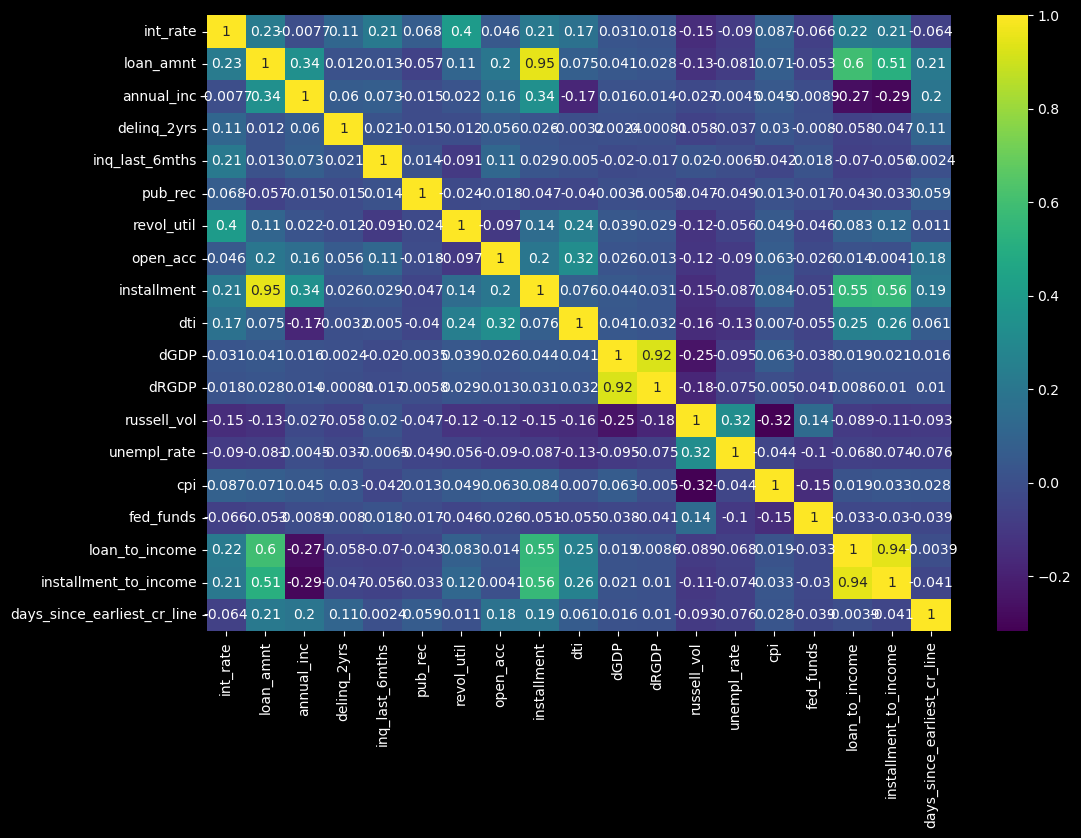

In [62]:
# Code retrieved from (Sayah, 2023)

plt.figure(figsize=(12, 8))
sns.heatmap(df_merged.corr(), annot=True, cmap='viridis')

Installment & loan amount have a correlation of 0.95.

dRGDP & dGDP have a correlation of 0.92.

installment to income & loan to income have a correlation of 0.94.

### Histograms for all numerical variables

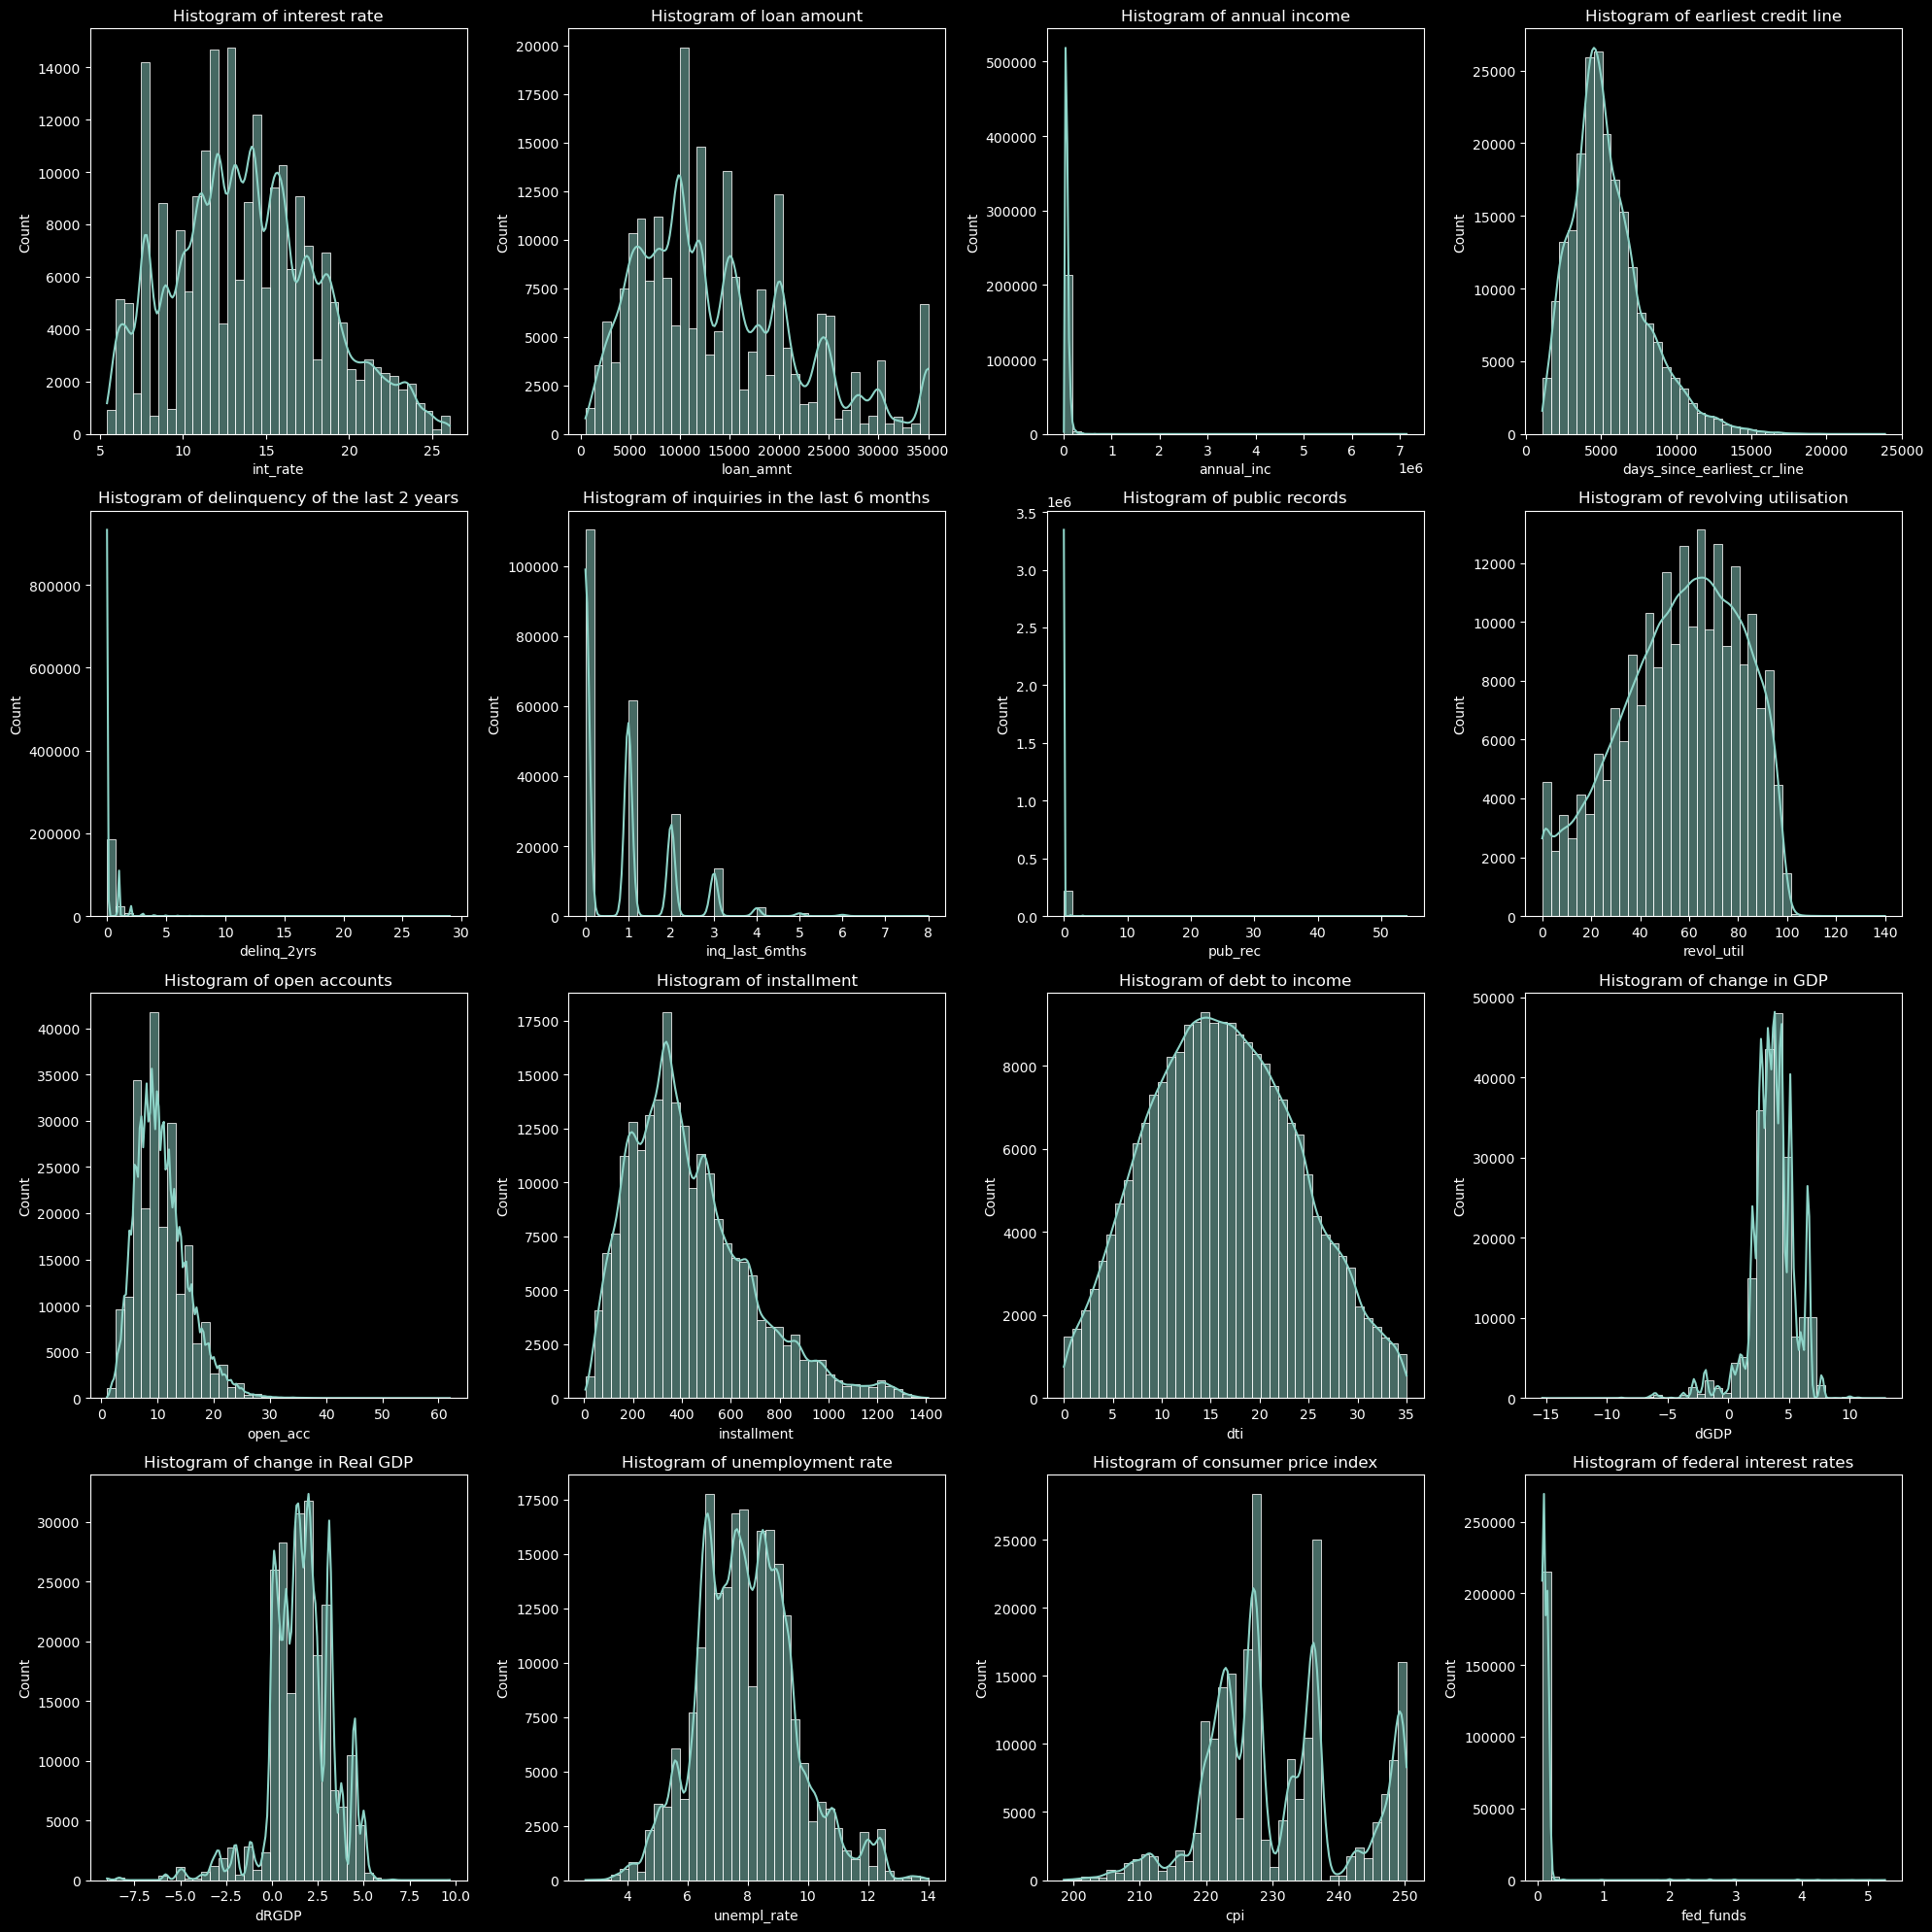

In [63]:
# Code retrieved from (Jenn, 2022)

# Defining variables and titles to plot
variables = ['int_rate', 'loan_amnt', 'annual_inc', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 
             'open_acc', 'installment', 'dti', 'dGDP', 'dRGDP', 'unempl_rate', 'cpi', 'fed_funds']
titles = ['interest rate', 'loan amount', 'annual income', 'earliest credit line', 'delinquency of the last 2 years', 
          'inquiries in the last 6 months', 'public records', 'revolving utilisation', 'open accounts', 
          'installment', 'debt to income', 'change in GDP', 'change in Real GDP', 'unemployment rate', 
          'consumer price index', 'federal interest rates']

fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # Create a grid of 4x4 subplots

# Creating histograms
for ax, var, title in zip(axs.ravel(), variables, titles):
    sns.histplot(data=df_merged, x=var, bins=40, kde=True, ax=ax)
    ax.set_title(f'Histogram of {title}')

plt.tight_layout()
plt.show()


In [64]:
# Creat a column for listing year
df_merged['year'] = df_merged['issue_d'].dt.year 

# Create a temporary dataframe for listing year and count
year_df = df_merged.groupby("year").issue_d.count().reset_index()
year_df

year  issue_d
0  2007      251
1  2008     1554
2  2009     4702
3  2010    11199
4  2011    20955
5  2012    51398
6  2013   128754

The number of issued loans is increasing year by year.

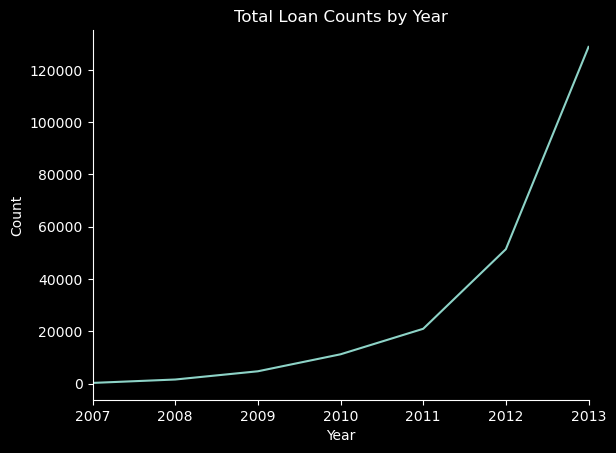

In [65]:
# Code retrieved from (Jenn, 2022)

# Create a line plot using the Seaborn library.
# The data for the plot comes from the 'year_df' dataframe.
# The x-axis represents the 'year' column and the y-axis represents the 'issue_d' column.
sns.lineplot(data = year_df, x = 'year', y = 'issue_d')

# Defining parameters
plt.title("Total Loan Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xlim((2007, 2013))
plt.xticks([2007, 2008, 2009, 2010, 2011, 2012, 2013], [2007, 2008, 2009, 2010, 2011, 2012, 2013])

sns.despine()
plt.show();

The graph show an exponential growth of loans issued between 2007 and 2013.

In [66]:
# Describing loan amount per loan status
df_merged.groupby(by='loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                                
Charged Off   33509.0  15071.049569  8433.121658  900.0  8500.0  14000.0   
Fully Paid   185304.0  13710.864849  8020.619018  500.0  7675.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  35000.0  
Fully Paid   19000.0  35000.0

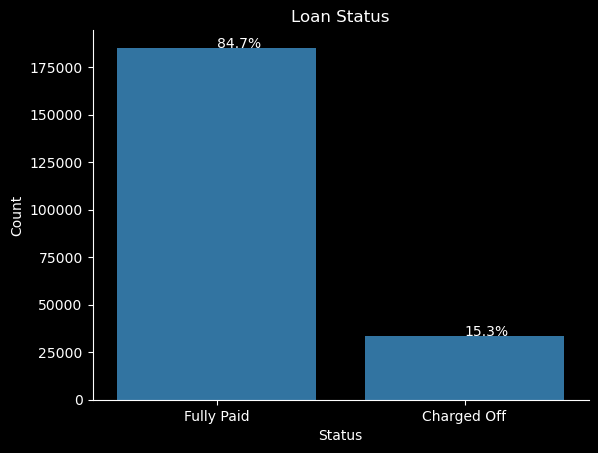

In [67]:
# Code retrieved from (Jenn, 2022)

ax = sns.countplot(data = df_merged, x = 'loan_status', order = df_merged.loan_status.value_counts().index, 
                    color = basic)

# The following block of code adds percentage annotations on top of each bar in the plot.

# Initialize a counter 'a' to keep track of how many bars have been annotated.
a = 0

# Loop over each bar (patch) in the count plot.
for p in ax.patches:
    if a < 4:
        total = len(df_merged.loan_status)
        percentage = "{:.1f}%".format(100 * p.get_height() / total) # Calculate the percentage that the height of the current bar represents.
        y = p.get_y() + p.get_height()
        x = (p.get_x() + p.get_width() / 2)
        ax.annotate(percentage, (x, y))
        a += 1
plt.title("Loan Status")
plt.xlabel('Status')
plt.ylabel('Count')

sns.despine()
plt.show();

Loans per LendingClub Grade

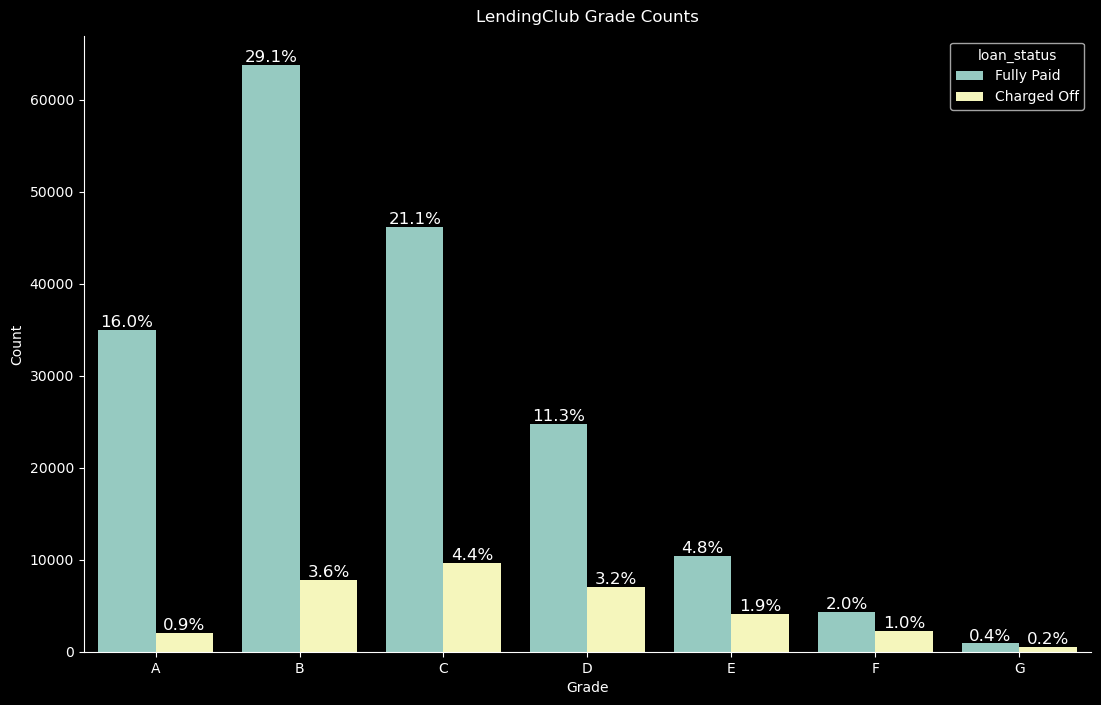

In [68]:
# Code retrieved from Sayah (2023)

# Set the size of the plot
plt.figure(figsize=(13, 8))

# Plot for LendingClub grade
order = sorted(df_merged.grade.unique())
ax = sns.countplot(data = df_merged, x = 'grade', hue = 'loan_status', order = order)
ax.set_title('LendingClub Grade Counts', pad = 10)
ax.set_xlabel('Grade')
ax.set_ylabel('Count')

# Total number of loans
total_loans = len(df_merged)

# Loop over each bar (patch) in the plot referenced by 'ax'.
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total_loans) # Calculate the percentage that the height of the current bar represents relative to 'total_loans'.
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();


From The graph above, we can see that 32.7% of the loans are labelled with a "B" grade, 25.5% with a "C" grade, and 16.9% with an "A" grade.
This indicates that 75.1% of all loans have a moderate to high level of creditworthiness, as per LendingClub's assessment.

Now, let us check how the subgrades are distributed.

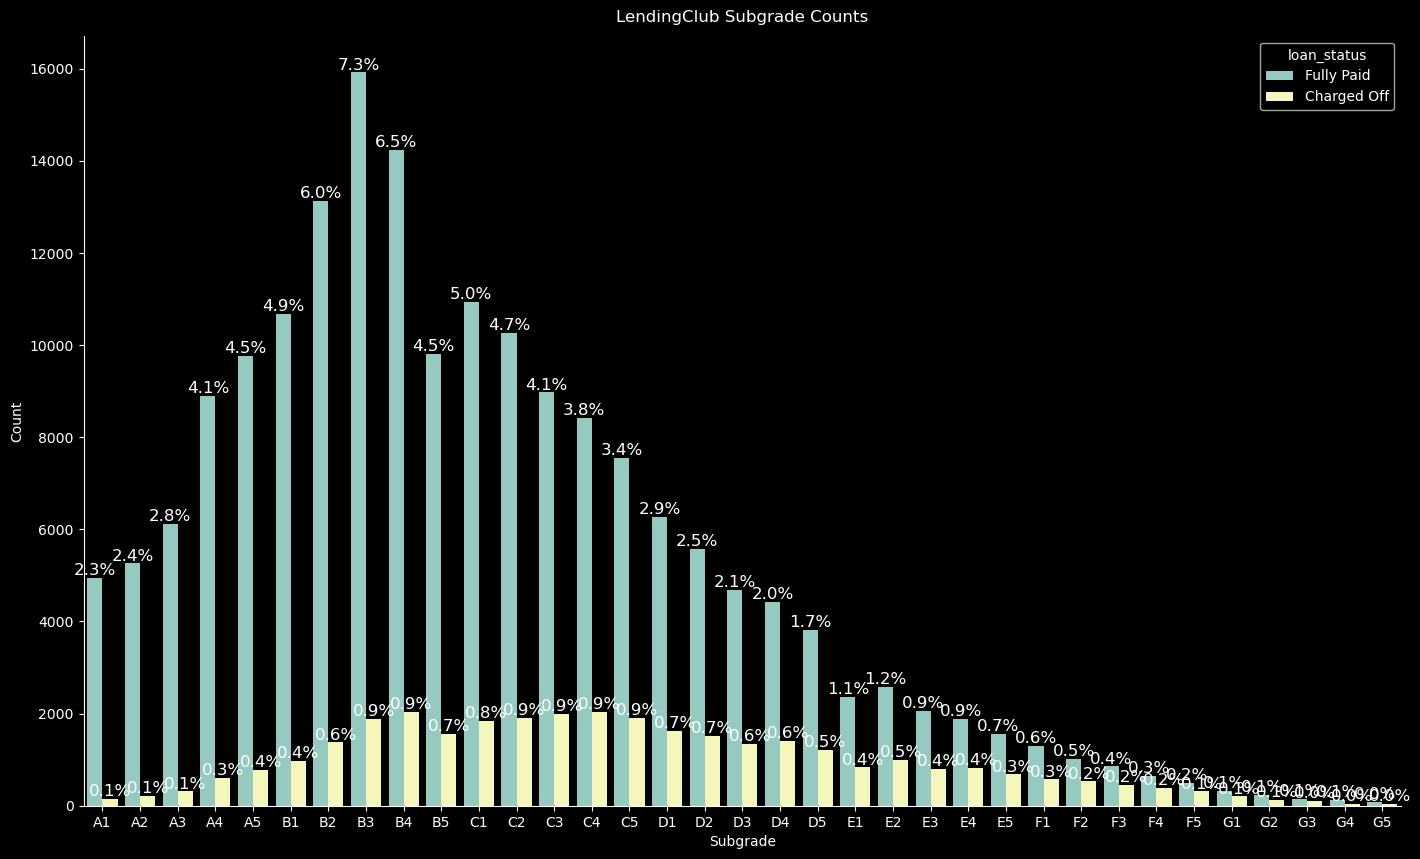

In [69]:
# Code retrieved from Sayah (2023)

# Set the size of the plot
plt.figure(figsize=(17, 10))

# Plot for LendingClub subgrade and loan status
order = sorted(df_merged.sub_grade.unique())
ax = sns.countplot(data = df_merged, x = 'sub_grade', hue = 'loan_status', order = order)
ax.set_title('LendingClub Subgrade Counts', pad = 10)
ax.set_xlabel('Subgrade')
ax.set_ylabel('Count')

# Total number of loans
total_loans = len(df_merged)

# Loop over each bar (patch) in the plot referenced by 'ax'
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total_loans) # Calculate the percentage that the height of the current bar represents relative to 'total_loans'.
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();


Most of the paid off loans are between the A4 and C1 loan sub-grade. Whereas the charged off loans range between B3 and D1.

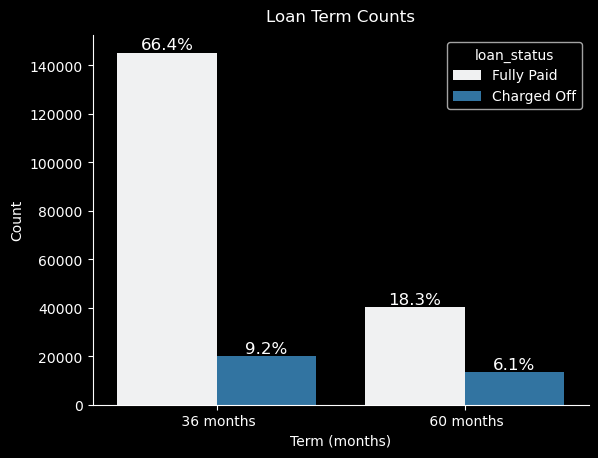

In [70]:
# Code retrieved from Sayah (2023)

# Determine the order of bars in the count plot based on the frequency of terms.
# This ensures that the terms with the highest counts will appear first.
term_order = df_merged.term.value_counts().index

# Create a countplot for each loan status per loan term
ax = sns.countplot(data = df_merged, x = 'term', hue = 'loan_status', color = basic, order = term_order)
ax.set_title("Loan Term Counts", pad = 10)
ax.set_xlabel('Term (months)')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.term.count() # Calculate the total number of entries in the 'term' column.
    percentage = "{:.1f}%".format(100*p.get_height()/total) # Calculate the percentage that the height of the current bar represents relative to the total.
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();


Loans with a 60 month term have a relatively higher default rate than 36 month loans. However, there are also significantly more 36 month loans issued than 60 month loans.

Nevertheless, we can dummify the loan terms for our regression analysis.

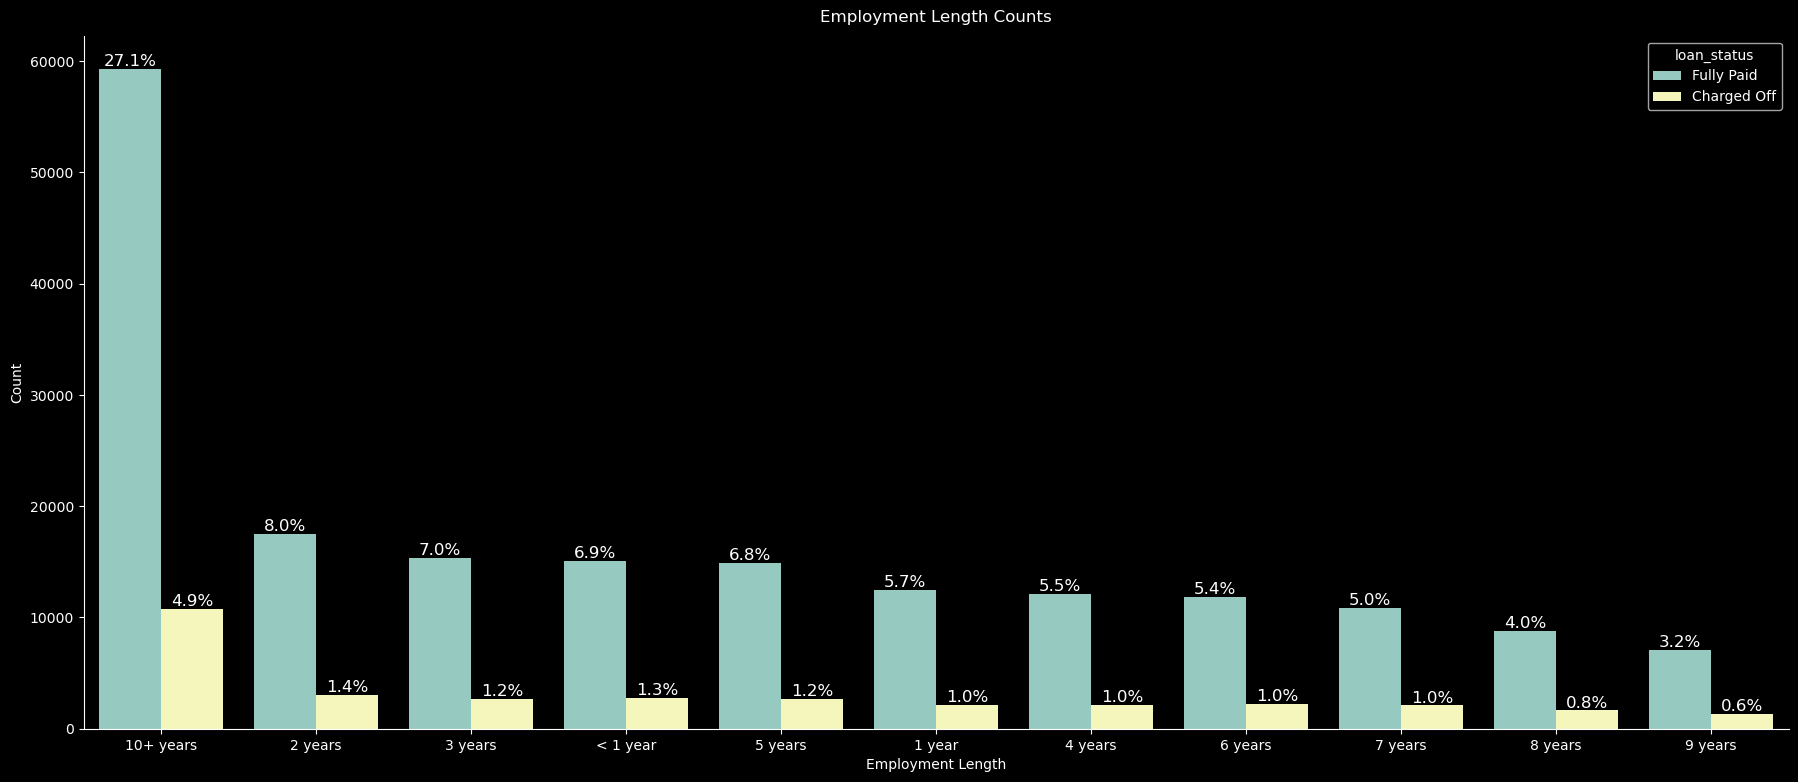

In [71]:
# Code retrieved from ChatGPT(2023)

plt.figure(figsize=(22, 9))

# Determine the order of bars in the count plot based on the frequency of employment lengths.
# This ensures that the employment lengths with the highest counts will appear first.
emp_length_order = df_merged.emp_length.value_counts().index

# Create a count plot using the Seaborn library for each employment length, one for each unique loan status.
ax = sns.countplot(data = df_merged, x = 'emp_length', hue = 'loan_status', order = emp_length_order)
ax.set_title("Employment Length Counts", pad = 10)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')

# Loop over each bar (patch) in the plot to annotate them with percentages.
for p in ax.patches:
    total = df_merged.emp_length.count()
    percentage = "{:.1f}%".format(100 * p.get_height() / total) # Calculate the percentage that the height of the current bar represents relative to the total.
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();

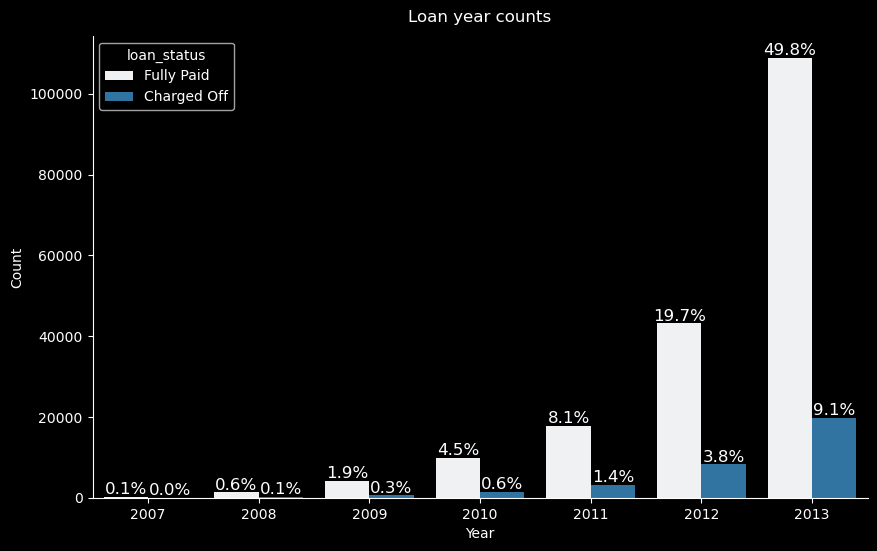

In [72]:
# Code retrieved from ChatGPT(2023)

plt.figure(figsize=(10, 6))

# Creating a countplot for each loan status per year
ax = sns.countplot(data = df_merged, x = 'year', hue = 'loan_status', color = basic)
ax.set_title("Loan year counts", pad = 10)
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Loop over each bar (patch) in the plot to annotate them with percentages.
for p in ax.patches:
    total = df_merged.year.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

In [73]:
# Code retrieved from ChatGPT(2023)

# Group by state and loan_status, then count the number of occurrences
loan_status_year_counts = df_merged.groupby(['year', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_year_counts.pivot(index='year', columns='loan_status', values='counts')

# Add a new column 'ratio' which is the ratio of 'Charged Off' to 'Fully Paid'
pivot_df['ratio'] = pivot_df['Charged Off'] / pivot_df['Fully Paid']

# Display the DataFrame to see the ratios
print(pivot_df)

loan_status  Charged Off  Fully Paid     ratio
year                                          
2007                  45         206  0.218447
2008                 243        1311  0.185355
2009                 591        4111  0.143761
2010                1407        9792  0.143689
2011                3139       17816  0.176190
2012                8256       43142  0.191368
2013               19828      108926  0.182032


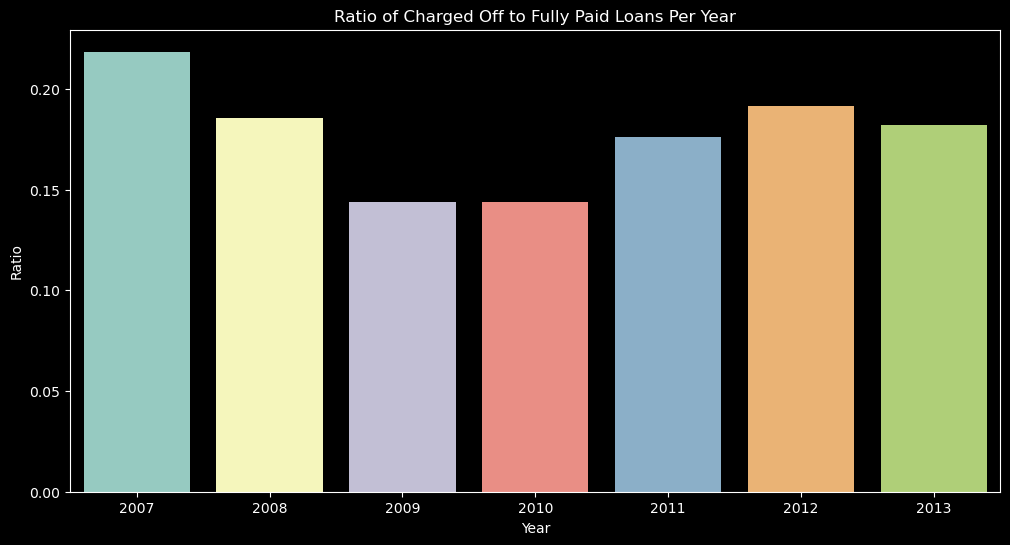

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's barplot function to plot the 'ratio' column
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_df.index, y=pivot_df['ratio'])
plt.title("Ratio of Charged Off to Fully Paid Loans Per Year")
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.show()

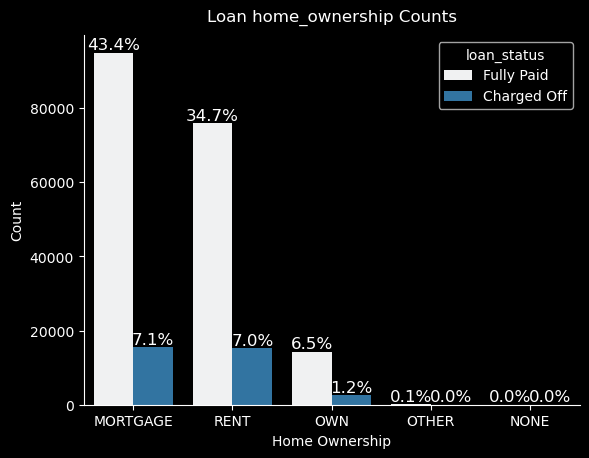

In [75]:
# Code retrieved from Sayah (2023)

home_ownership_order = df_merged.home_ownership.value_counts().index

# Create a countplot for home ownership and loan status
ax = sns.countplot(data = df_merged, x = 'home_ownership', hue = 'loan_status', color = basic, order = home_ownership_order)
ax.set_title("Loan home_ownership Counts", pad = 10)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')

# Loop over each bar (patch) in the plot to annotate them with percentages.
for p in ax.patches:
    total = df_merged.home_ownership.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total) # Get percentages above the bars
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

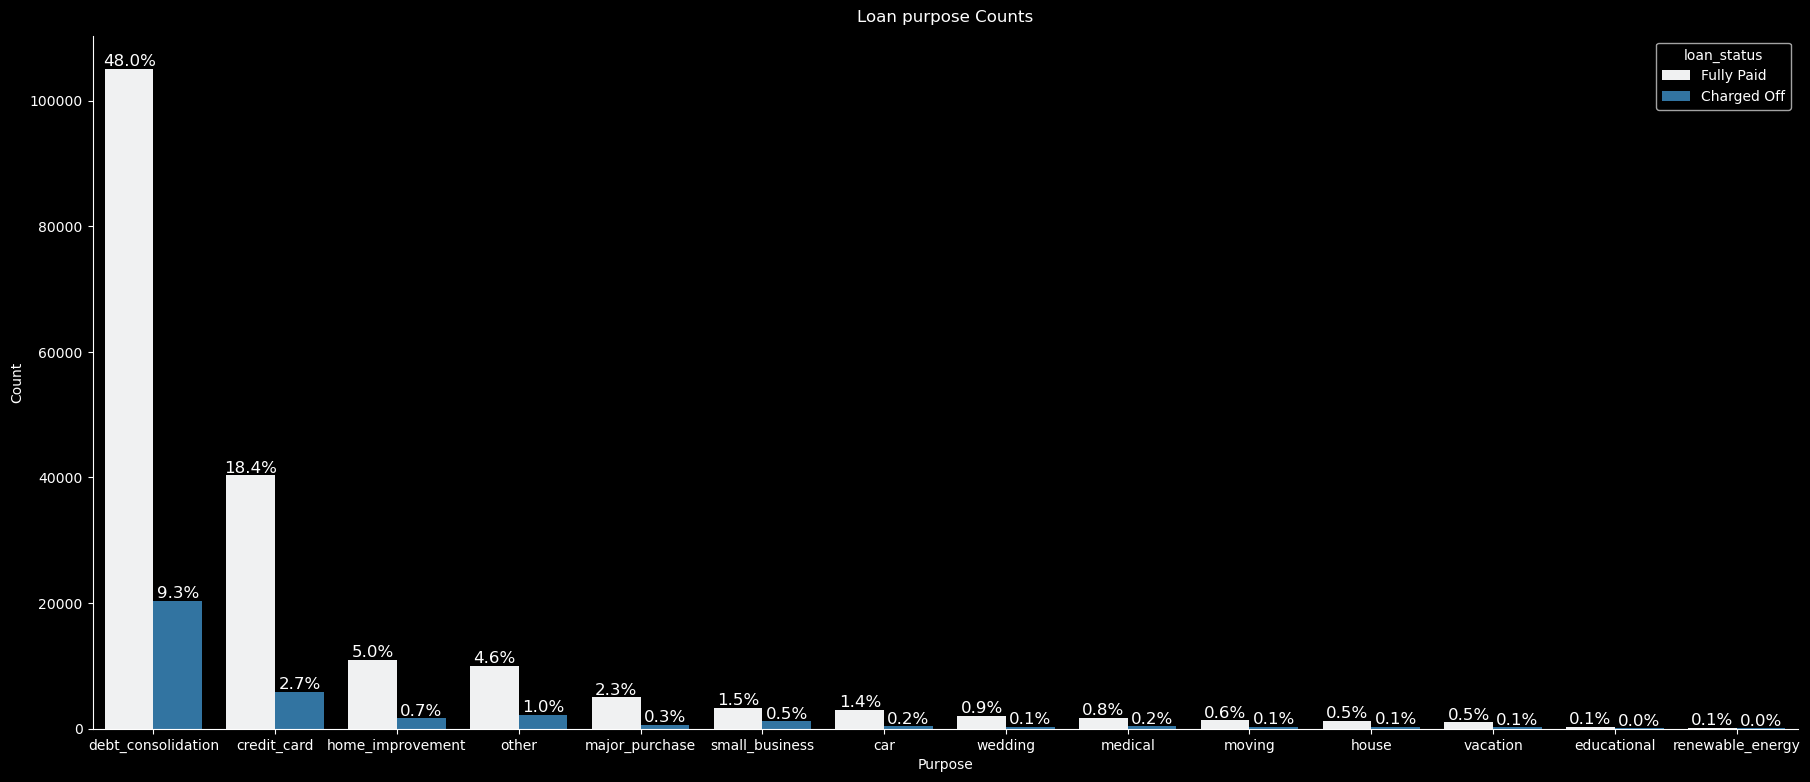

In [76]:
# Code retrieved from Sayah (2023)

plt.figure(figsize=(22, 9))

purpose_order = df_merged.purpose.value_counts().index

# Create a countplot per purpose on loan status
ax = sns.countplot(data = df_merged, x = 'purpose', hue = 'loan_status', color = basic, order = purpose_order)
ax.set_title("Loan purpose Counts", pad = 10)
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')

# Loop over each bar (patch) in the plot to annotate them with percentages.
for p in ax.patches:
    total = df_merged.purpose.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total) # Get percentages for each bar
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

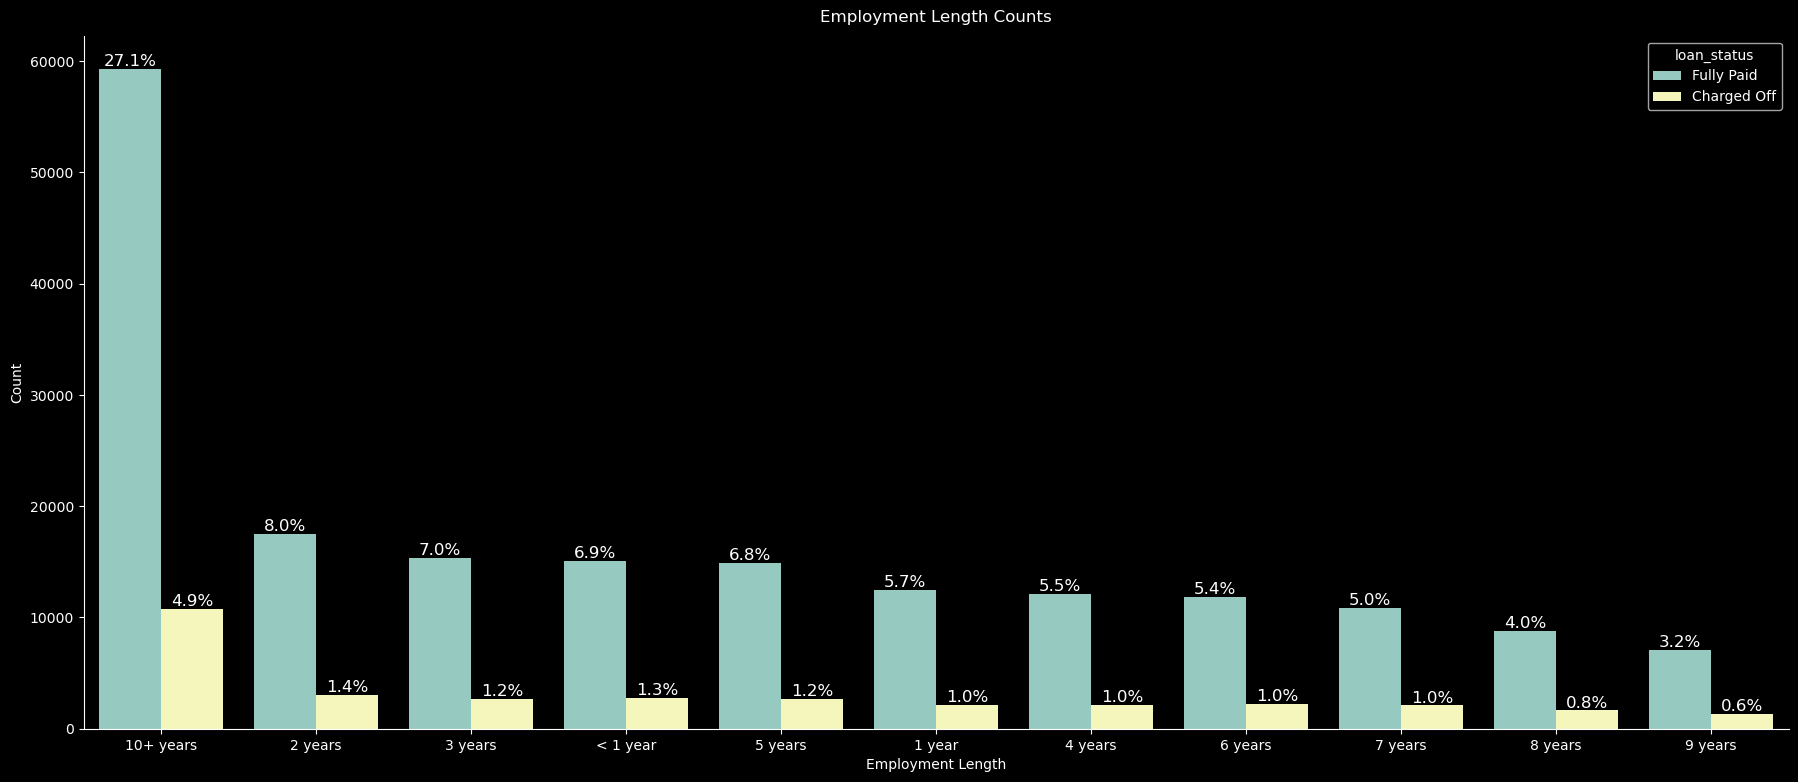

In [77]:
# Code retrieved from Sayah (2023)

plt.figure(figsize=(22, 9))

emp_length_order = df_merged.emp_length.value_counts().index

# Create a countplot for employment length and loan status
ax = sns.countplot(data = df_merged, x = 'emp_length', hue = 'loan_status', order = emp_length_order)
ax.set_title("Employment Length Counts", pad = 10)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')

# Loop over each bar and get percentages
for p in ax.patches:
    total = df_merged.emp_length.count()
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();

Borrowers who have been employed for longer thatn 10 years are more likely to pay off their loans. However, besides the 10+ years employment, we do not see a trend in which years of employment affect loan repayment.

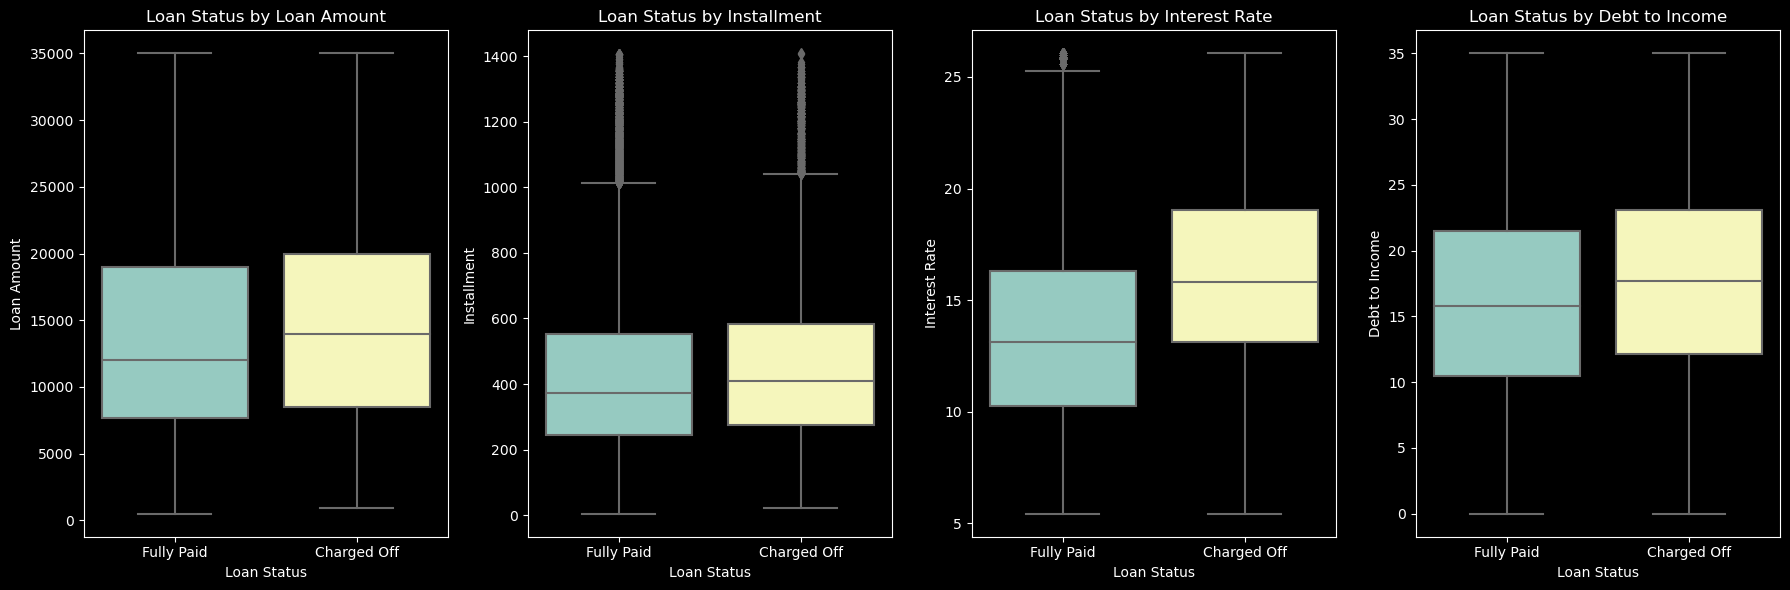

In [78]:
# Code retrieved from Sayah (2023)

fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

# Box plot for loan_amnt
sns.boxplot(data=df_merged, x='loan_status', y='loan_amnt', ax=axes[0])
axes[0].set_title('Loan Status by Loan Amount')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Loan Amount')

# Box plot for installment
sns.boxplot(data=df_merged, x='loan_status', y='installment', ax=axes[1])
axes[1].set_title('Loan Status by Installment')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Installment')

# Box plot for interest rate
sns.boxplot(data=df_merged, x='loan_status', y='int_rate', ax=axes[2])
axes[2].set_title('Loan Status by Interest Rate')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Interest Rate')

# Box plot for dti
sns.boxplot(data=df_merged, x='loan_status', y='dti', ax=axes[3])
axes[3].set_title('Loan Status by Debt to Income')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Debt to Income')

plt.tight_layout()
plt.show()


Indicated by the dots outside the candlesticks at the 2nd and 3rd graph, there is a significant amount of outliers. 

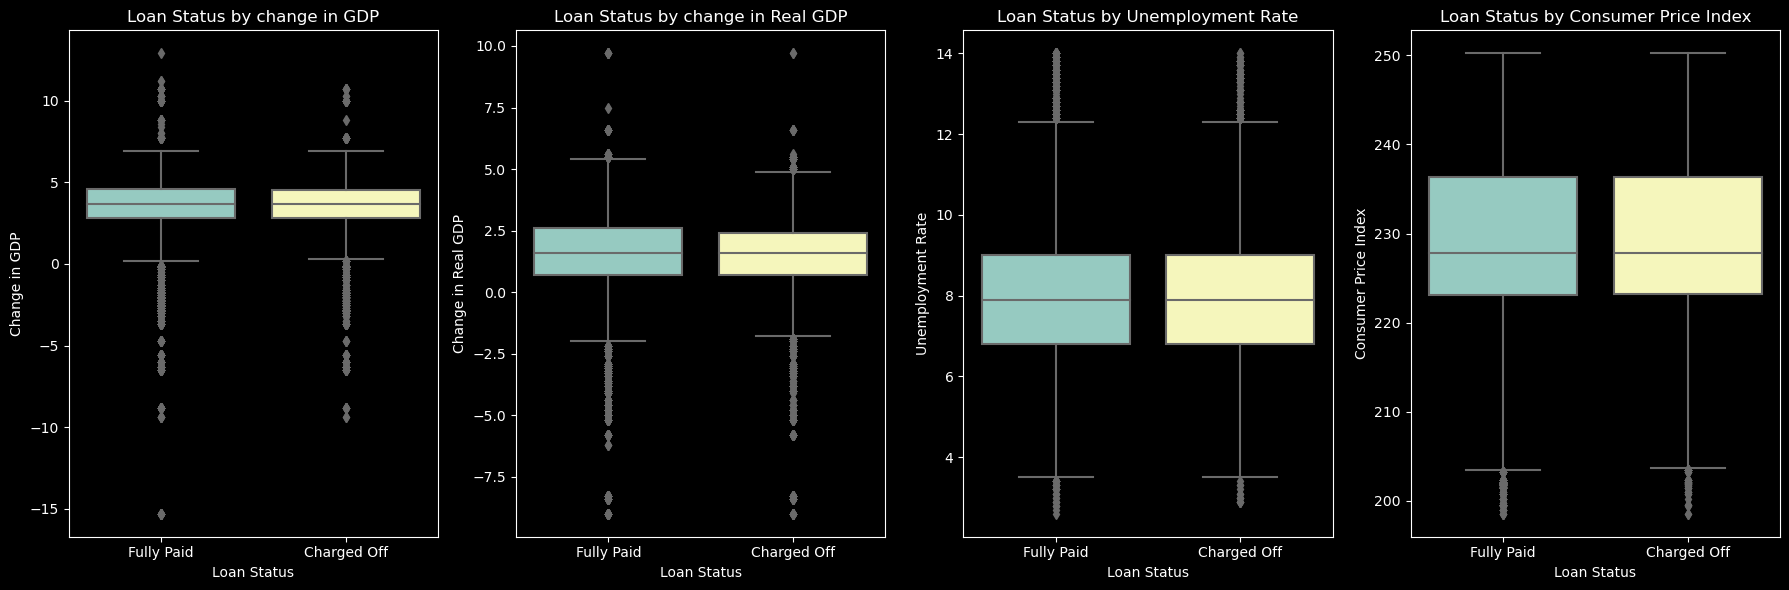

In [79]:
# Code retrieved from Sayah (2023)

fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

# Box plot for change in GDP
sns.boxplot(data=df_merged, x='loan_status', y='dGDP', ax=axes[0])
axes[0].set_title('Loan Status by change in GDP')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Change in GDP')

# Box plot for installment
sns.boxplot(data=df_merged, x='loan_status', y='dRGDP', ax=axes[1])
axes[1].set_title('Loan Status by change in Real GDP')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Change in Real GDP')

# Box plot for interest rate
sns.boxplot(data=df_merged, x='loan_status', y='unempl_rate', ax=axes[2])
axes[2].set_title('Loan Status by Unemployment Rate')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Unemployment Rate')

# Box plot for dti
sns.boxplot(data=df_merged, x='loan_status', y='cpi', ax=axes[3])
axes[3].set_title('Loan Status by Consumer Price Index')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Consumer Price Index')

plt.tight_layout()
plt.show()

Again, we notice a significant amount of outliers in all the graphs above.

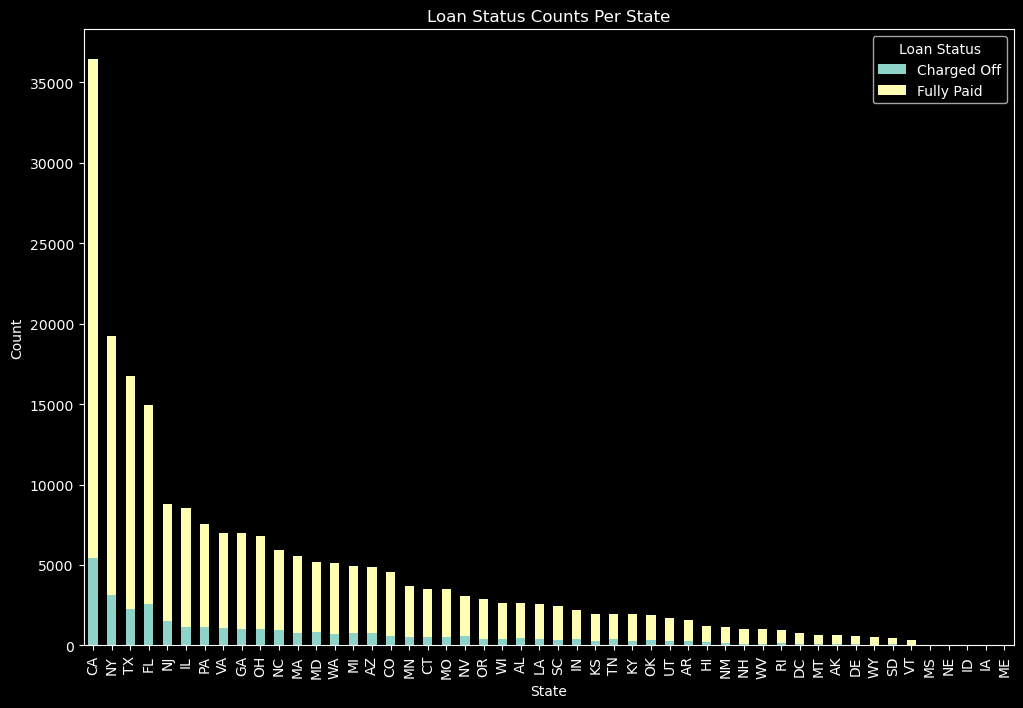

In [80]:
# Code retrieved from ChatGPT (2023)

# Group by state and loan_status, then count the number of occurrences
loan_status_counts = df_loans4.groupby(['addr_state', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_counts.pivot(index='addr_state', columns='loan_status', values='counts')

# Calculate total count per state and sort by it in descending order
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='total', ascending=False)

# Drop the total column as we don't need it anymore
pivot_df = pivot_df.drop(columns=['total'])

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,8))

plt.title('Loan Status Counts Per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()


The graph clearly illustrates that California leads in the number of issued loans, significantly surpassing New York, Texas, and Florida. This is expected considering that LendingClub, the loan issuer, is headquartered in San Francisco, California.

Nonetheless, a closer examination reveals that California also has the highest count of charged-off loans. Despite this, it's essential to look beyond absolute numbers and assess the ratio between fully paid and charged-off loans per state, as it offers insights into the default rate.

In [81]:
# Group by state and loan_status, then count the number of occurrences
loan_status_counts = df_loans4.groupby(['addr_state', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_counts.pivot(index='addr_state', columns='loan_status', values='counts')

# Add a new column 'ratio' which is the ratio of 'Charged Off' to 'Fully Paid'
pivot_df['ratio'] = pivot_df['Charged Off'] / pivot_df['Fully Paid']

# Display the DataFrame to see the ratios
print(pivot_df)

loan_status  Charged Off  Fully Paid     ratio
addr_state                                    
AK                  89.0       536.0  0.166045
AL                 455.0      2193.0  0.207478
AR                 262.0      1317.0  0.198937
AZ                 750.0      4115.0  0.182260
CA                5456.0     31010.0  0.175943
CO                 575.0      4005.0  0.143571
CT                 511.0      3020.0  0.169205
DC                  65.0       698.0  0.093123
DE                  84.0       474.0  0.177215
FL                2603.0     12339.0  0.210957
GA                1011.0      5964.0  0.169517
HI                 214.0      1026.0  0.208577
IA                   1.0         5.0  0.200000
ID                   1.0         6.0  0.166667
IL                1161.0      7359.0  0.157766
IN                 385.0      1830.0  0.210383
KS                 263.0      1721.0  0.152818
KY                 303.0      1632.0  0.185662
LA                 420.0      2174.0  0.193192
MA           

Differences in this ratio across states suggest that certain state-specific factors may be influencing the likelihood of loan default. For instance, while Texas has issued more loans than Florida, the default rate in Florida surprisingly exceeds that of Texas. This underlines the importance of considering regional factors when evaluating the risk of loan default.

In [82]:
import plotly.express as px

# Group by state and loan status, then count the number of occurrences
state_loan_counts = df_merged.groupby('addr_state').size().reset_index(name='counts')

# Group by state and loan status, then count the number of occurrences
loan_status_counts = df_merged[df_merged['loan_status'].isin(['Charged Off', 'Fully Paid'])].groupby(['addr_state', 'loan_status']).size().unstack(fill_value=0)
loan_status_counts['Ratio'] = loan_status_counts['Charged Off'] / loan_status_counts['Fully Paid']
loan_status_counts = loan_status_counts.reset_index()

# Merge the loan count and loan status ratio
state_loan_counts = state_loan_counts.merge(loan_status_counts[['addr_state', 'Charged Off', 'Fully Paid', 'Ratio']], on='addr_state', how='left')

fig = px.choropleth(state_loan_counts, 
                    locations='addr_state', 
                    color='counts', 
                    locationmode="USA-states", 
                    scope="usa",
                    labels={'counts': 'Loan Count'},
                    title='Loan Count per State',
                    color_continuous_scale='Blues')

fig.update_layout(
    coloraxis_colorbar=dict(title='Loan Count'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Add extra information to hover text
fig.update_traces(hovertemplate='<b>%{location}</b><br>Loan Count: %{z}<br>Charged Off: %{customdata[0]}<br>Fully Paid: %{customdata[1]}<br>Ratio: %{customdata[2]:.2f}')

# Assign charged off, fully paid counts, and ratio as custom data
fig.data[0].update(customdata=state_loan_counts[['Charged Off', 'Fully Paid', 'Ratio']].values)

fig.show()


In [83]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Lawrence\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3386: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



# Hypothesis Testing

H1: The loan grades assigned by lenders will exhibit a strong association with loan defaults. Specifically, it is hypothesized that borrowers with lower loan grades will have a higher probability of default compared to those with higher loan grades.

For this hypothesis, we first perform a Chi-square test since grade, sub-grade, and loan status are categorical variables.

In [84]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_merged['grade'], df_merged['loan_status'])

# Perform the Chi-square test using loan grade
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square Value = {chi2}")
print(f"P-value = {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between loan grades and loan defaults.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between loan grades and loan defaults.")

# Cramér's V calculation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for the contingency table
result = cramers_v(contingency_table.values)
print(f"Cramér's V Value = {result}")

Chi-square Value = 9299.132680020586
P-value = 0.0
Reject the null hypothesis: There is a significant association between loan grades and loan defaults.
Cramér's V Value = 0.20608458135772878


In [98]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_merged['sub_grade'], df_merged['loan_status'])

# Perform the Chi-square test using loan grade
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square Value = {chi2}")
print(f"P-value = {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between loan sub-grades and loan defaults.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between loan sub-grades and loan defaults.")

# Cramér's V calculation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for the contingency table
result = cramers_v(contingency_table.values)
print(f"Cramér's V Value = {result}")

Chi-square Value = 9905.596599094226
P-value = 0.0
Reject the null hypothesis: There is a significant association between loan sub-grades and loan defaults.
Cramér's V Value = 0.21240176856100965


H2: Variations in macroeconomic conditions, as captured by relevant indicators such as GDP growth, unemployment rate, and inflation, will have a statistically significant association with the likelihood of P2P loan defaults.

For this hypothesis, each macroeconomic variable is first tested for its distribution, after which the appropiate testing method is determined.

To check the distribution, a histogram, boxplot, and Shapiro-Wilk test is performed.

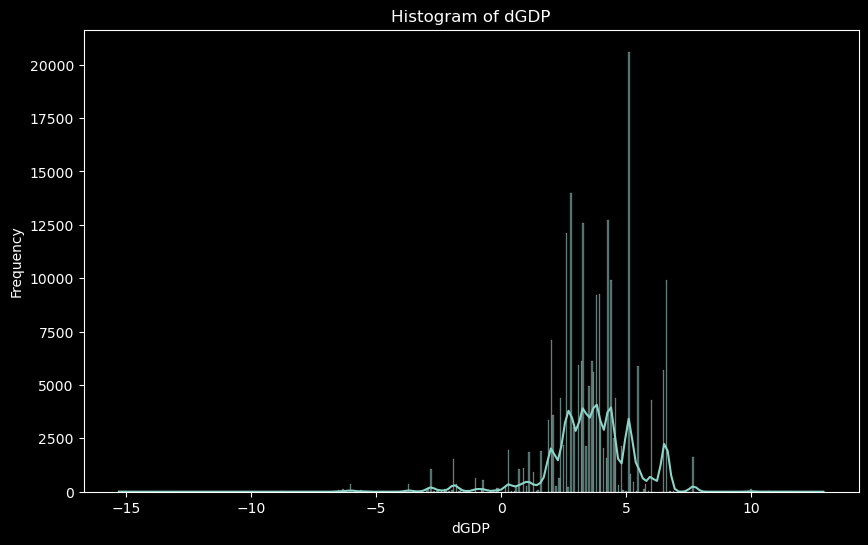

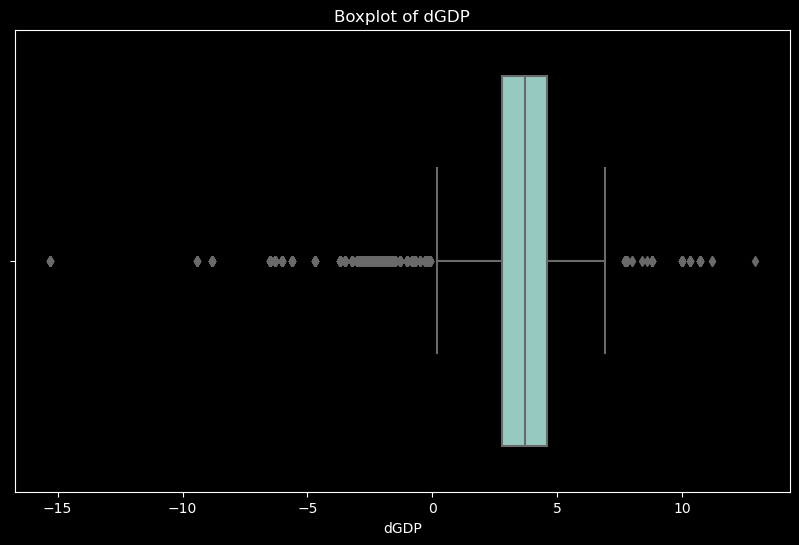

count    218813.000000
mean          3.650872
std           1.795184
min         -15.300000
25%           2.800000
50%           3.700000
75%           4.600000
max          12.900000
Name: dGDP, dtype: float64
dGDP does not appear to be normally distributed (Shapiro-Wilk Test)


c:\Users\Lawrence\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [99]:
# Code retrieved from ChatGPT (2023)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Data
data = df_merged['dGDP']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of dGDP')
plt.xlabel('dGDP')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.title('Boxplot of dGDP')
plt.show()

# Descriptive Statistics
print(data.describe())

# Normality Test (Shapiro-Wilk)
stat, p = shapiro(data.dropna())  # dropna() is used to remove missing values before the test
if p > 0.05:
    print('dGDP appears to be normally distributed (Shapiro-Wilk Test)')
else:
    print('dGDP does not appear to be normally distributed (Shapiro-Wilk Test)')


dGDP is not normally distributed. A non-parametric test such as the Mann-Whitney U test is therefore in order.

In [100]:
# Code retrieved from ChatGPT (2023)

from scipy.stats import mannwhitneyu

# Split the data based on loan_status
dgdp_charged_off = df_merged[df_merged['loan_status'] == 'Charged Off']['dGDP']
dgdp_fully_paid = df_merged[df_merged['loan_status'] == 'Fully Paid']['dGDP']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(dgdp_charged_off, dgdp_fully_paid, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in GDP change between defaulted and fully paid loans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GDP change between defaulted and fully paid loans.")

Statistic: 3058287114.5
P-value: 1.274923604603576e-05
Reject the null hypothesis: There is a significant difference in GDP change between defaulted and fully paid loans.


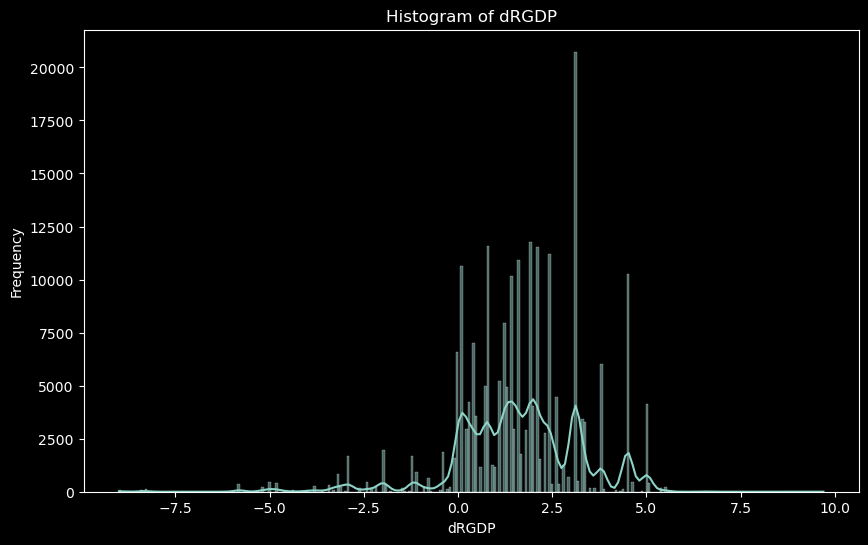

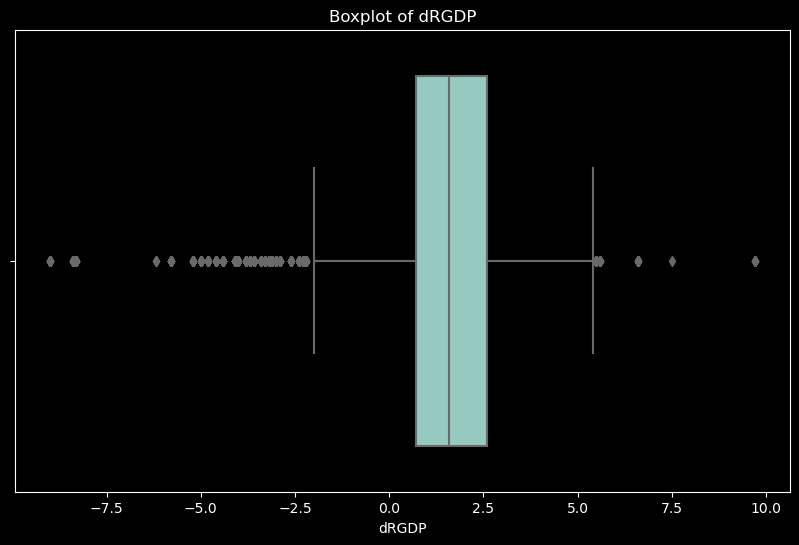

count    218813.000000
mean          1.614539
std           1.694974
min          -9.000000
25%           0.700000
50%           1.600000
75%           2.600000
max           9.700000
Name: dRGDP, dtype: float64
dRGDP does not appear to be normally distributed (Shapiro-Wilk Test)


c:\Users\Lawrence\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [101]:
# Code retrieved from ChatGPT (2023)

# Data
data = df_merged['dRGDP']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of dRGDP')
plt.xlabel('dRGDP')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.title('Boxplot of dRGDP')
plt.show()

# Descriptive Statistics
print(data.describe())

# Normality Test (Shapiro-Wilk)
stat, p = shapiro(data.dropna())  # dropna() is used to remove missing values before the test
if p > 0.05:
    print('dRGDP appears to be normally distributed (Shapiro-Wilk Test)')
else:
    print('dRGDP does not appear to be normally distributed (Shapiro-Wilk Test)')

In [102]:
# Code retrieved from ChatGPT (2023)

from scipy.stats import mannwhitneyu

# Split the data based on loan_status
drgdp_charged_off = df_merged[df_merged['loan_status'] == 'Charged Off']['dRGDP']
drgdp_fully_paid = df_merged[df_merged['loan_status'] == 'Fully Paid']['dRGDP']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(drgdp_charged_off, dgdp_fully_paid, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in real GDP change between defaulted and fully paid loans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in real GDP change between defaulted and fully paid loans.")

Statistic: 1017813682.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference in real GDP change between defaulted and fully paid loans.


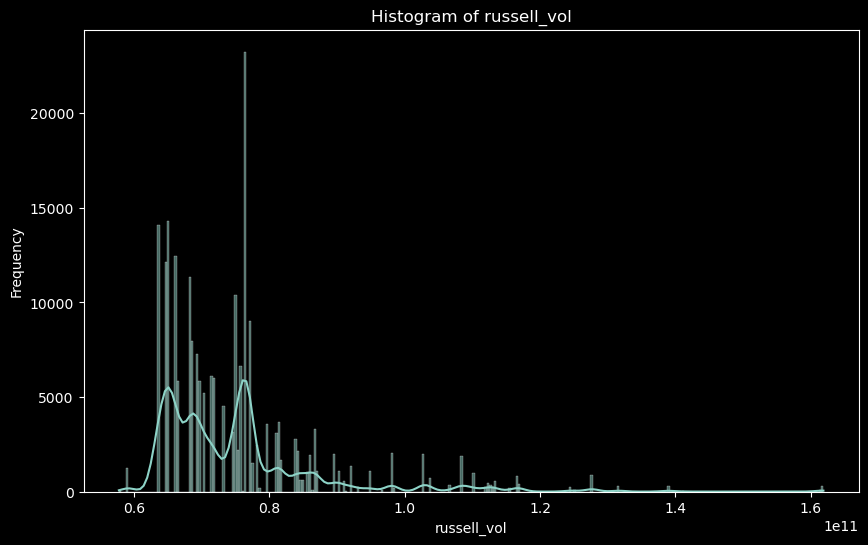

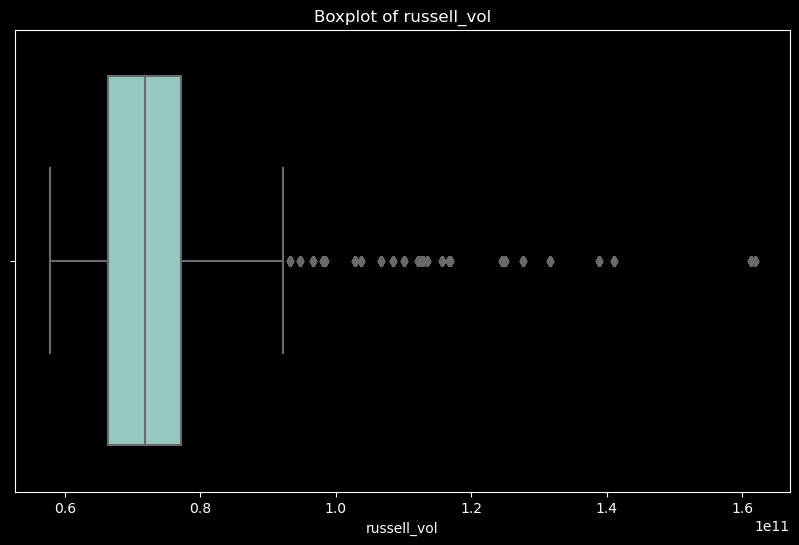

count    2.188130e+05
mean     7.501641e+10
std      1.210966e+10
min      5.780970e+10
25%      6.638818e+10
50%      7.175232e+10
75%      7.709800e+10
max      1.618436e+11
Name: russell_vol, dtype: float64
russell_vol does not appear to be normally distributed (Shapiro-Wilk Test)


c:\Users\Lawrence\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [103]:
# Code retrieved from ChatGPT (2023)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Data
data = df_merged['russell_vol']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of russell_vol')
plt.xlabel('russell_vol')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.title('Boxplot of russell_vol')
plt.show()

# Descriptive Statistics
print(data.describe())

# Normality Test (Shapiro-Wilk)
stat, p = shapiro(data.dropna())  # dropna() is used to remove missing values before the test
if p > 0.05:
    print('russell_vol appears to be normally distributed (Shapiro-Wilk Test)')
else:
    print('russell_vol does not appear to be normally distributed (Shapiro-Wilk Test)')


In [104]:
# Code retrieved from ChatGPT (2023)

from scipy.stats import mannwhitneyu

# Split the data based on loan_status
russell_charged_off = df_merged[df_merged['loan_status'] == 'Charged Off']['russell_vol']
russell_fully_paid = df_merged[df_merged['loan_status'] == 'Fully Paid']['russell_vol']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(russell_charged_off, russell_fully_paid, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in Russell index market volume between defaulted and fully paid loans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Russell index market volume between defaulted and fully paid loans.")

Statistic: 3093224123.5
P-value: 0.28140162691881987
Fail to reject the null hypothesis: There is no significant difference in Russell index market volume between defaulted and fully paid loans.


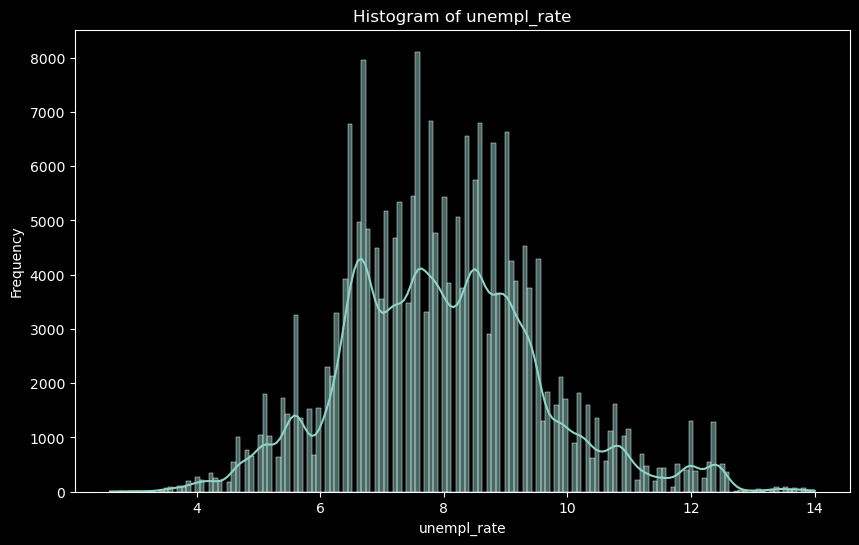

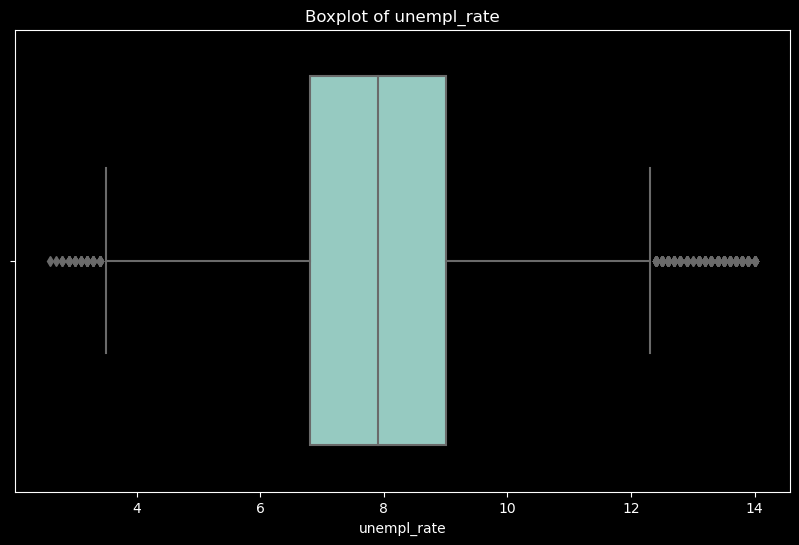

count    218813.000000
mean          7.972769
std           1.615100
min           2.600000
25%           6.800000
50%           7.900000
75%           9.000000
max          14.000000
Name: unempl_rate, dtype: float64
unempl_rate does not appear to be normally distributed (Shapiro-Wilk Test)


c:\Users\Lawrence\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [105]:
# Code retrieved from ChatGPT (2023)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Data
data = df_merged['unempl_rate']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of unempl_rate')
plt.xlabel('unempl_rate')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.title('Boxplot of unempl_rate')
plt.show()

# Descriptive Statistics
print(data.describe())

# Normality Test (Shapiro-Wilk)
stat, p = shapiro(data.dropna())  # dropna() is used to remove missing values before the test
if p > 0.05:
    print('unempl_rate appears to be normally distributed (Shapiro-Wilk Test)')
else:
    print('unempl_rate does not appear to be normally distributed (Shapiro-Wilk Test)')


In [106]:
# Code retrieved from ChatGPT (2023)

from scipy.stats import mannwhitneyu

# Split the data based on loan_status
unempl_charged_off = df_merged[df_merged['loan_status'] == 'Charged Off']['unempl_rate']
unempl_fully_paid = df_merged[df_merged['loan_status'] == 'Fully Paid']['unempl_rate']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(unempl_charged_off, unempl_fully_paid, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in unemployment rate between defaulted and fully paid loans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in unemployment rate between defaulted and fully paid loans.")

Statistic: 3123971148.5
P-value: 0.06970902885825532
Fail to reject the null hypothesis: There is no significant difference in unemployment rate between defaulted and fully paid loans.


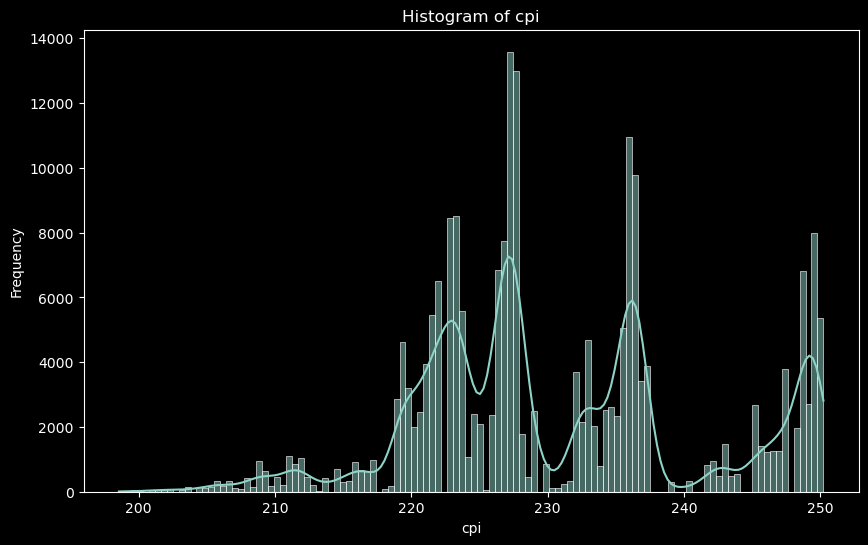

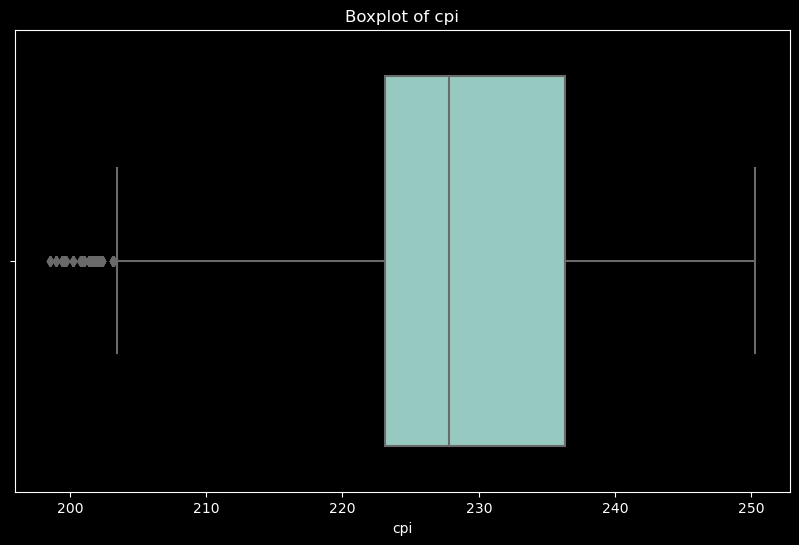

count    218813.000000
mean        230.735677
std          10.427944
min         198.551000
25%         223.109000
50%         227.837000
75%         236.341000
max         250.231000
Name: cpi, dtype: float64
cpi does not appear to be normally distributed (Shapiro-Wilk Test)


c:\Users\Lawrence\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [107]:
# Code retrieved from ChatGPT (2023)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Data
data = df_merged['cpi']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of cpi')
plt.xlabel('cpi')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.title('Boxplot of cpi')
plt.show()

# Descriptive Statistics
print(data.describe())

# Normality Test (Shapiro-Wilk)
stat, p = shapiro(data.dropna())  # dropna() is used to remove missing values before the test
if p > 0.05:
    print('cpi appears to be normally distributed (Shapiro-Wilk Test)')
else:
    print('cpi does not appear to be normally distributed (Shapiro-Wilk Test)')


In [108]:
# Code retrieved from ChatGPT (2023)

from scipy.stats import mannwhitneyu

# Split the data based on loan_status
cpi_charged_off = df_merged[df_merged['loan_status'] == 'Charged Off']['cpi']
cpi_fully_paid = df_merged[df_merged['loan_status'] == 'Fully Paid']['cpi']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(cpi_charged_off, cpi_fully_paid, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in consumer price index between defaulted and fully paid loans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in consumer price index between defaulted and fully paid loans.")

Statistic: 3143157070.5
P-value: 0.0002984193988263635
Reject the null hypothesis: There is a significant difference in consumer price index between defaulted and fully paid loans.


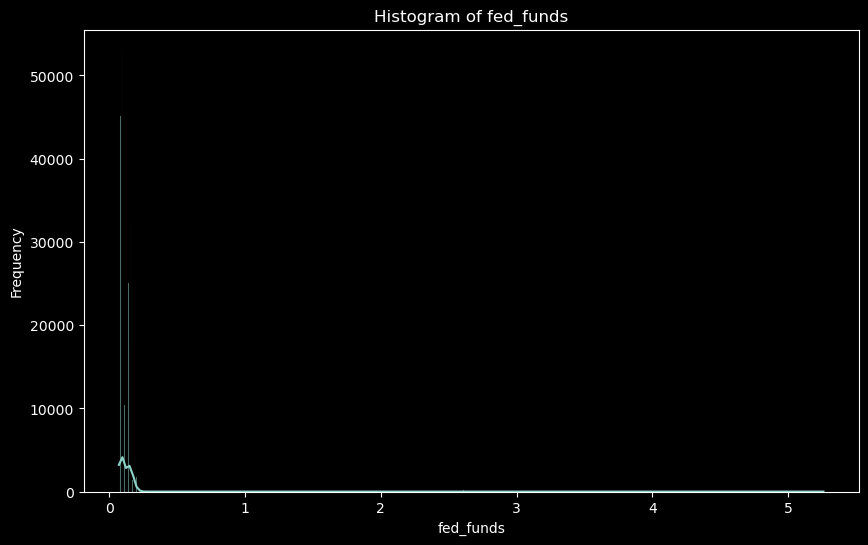

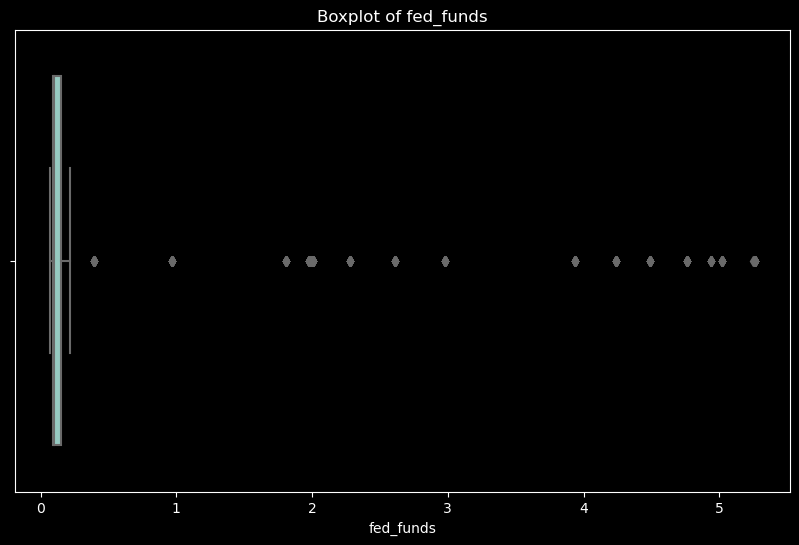

count    218813.000000
mean          0.134663
std           0.240807
min           0.070000
25%           0.090000
50%           0.100000
75%           0.150000
max           5.260000
Name: fed_funds, dtype: float64
fed_funds does not appear to be normally distributed (Shapiro-Wilk Test)


c:\Users\Lawrence\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [109]:
# Code retrieved from ChatGPT (2023)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Data
data = df_merged['fed_funds']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of fed_funds')
plt.xlabel('fed_funds')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.title('Boxplot of fed_funds')
plt.show()

# Descriptive Statistics
print(data.describe())

# Normality Test (Shapiro-Wilk)
stat, p = shapiro(data.dropna())  # dropna() is used to remove missing values before the test
if p > 0.05:
    print('fed_funds appears to be normally distributed (Shapiro-Wilk Test)')
else:
    print('fed_funds does not appear to be normally distributed (Shapiro-Wilk Test)')


In [110]:
# Code retrieved from ChatGPT (2023)

from scipy.stats import mannwhitneyu

# Split the data based on loan_status
fed_charged_off = df_merged[df_merged['loan_status'] == 'Charged Off']['fed_funds']
fed_fully_paid = df_merged[df_merged['loan_status'] == 'Fully Paid']['fed_funds']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(fed_charged_off, fed_fully_paid, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in federal funds rate between defaulted and fully paid loans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in federal funds rate between defaulted and fully paid loans.")

Statistic: 3080216805.5
P-value: 0.019705367830818065
Reject the null hypothesis: There is a significant difference in federal funds rate between defaulted and fully paid loans.


# Conclusion

The Chi-Square test indicated that there is a significant association between loan grades, sub-grades and loan defaults.

Furthermore, all macroeconomic variables are not normally distributed. As a result, the non-parametric Whitney-Mann U test was performed.

The test indicated that there is a significant difference between charged off and fully paid loans for the variables: dGDP, dRGDP, CPI, and federal funds rate.

The test also indicated that there is no significant difference between charged off and fully paid loans for the unemployment rate and Russell Index Volume.

However, to definitively conclude the effects of the aforementioned variables on loan defaults, a logistic regression is performed in the following notebooks.

# References

Ovaiz Ali. (2023). 🏃‍♂ Loan Defaulters - PyCaret AutoML. Kaggle. https://www.kaggle.com/code/ovaizali/loan-defaulters-pycaret-automl

Fares Sayah. (2023). 🏦 Lending Club Loan 💰 Defaulters 🏃‍♂ Prediction. Kaggle. https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/notebook

Sejung Jenn. (2022). Prosper Loan Data EDA. Kaggle. https://www.kaggle.com/code/sejungjenn/prosper-loan-data-eda/notebook

Riccardo Pinosio. (2022). DDB_AI/credit_risk_case_study/modelling.ipynb at main · riccardopinosio/DDB_AI. GitHub. https://github.com/riccardopinosio/DDB_AI/blob/main/credit_risk_case_study/modelling.ipynb

ChatGPT. (2023). https://chat.openai.com/